<a href="https://colab.research.google.com/github/ldgk2712/Analyze_customer_ticket_purchasing_behavior/blob/main/Analysis_Project_Customer_Ticket_Purchasing_Behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Load data**


In [1]:
# import 1 số thư viện quan trọng
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [2]:
# Connect with Google Drive:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_customer = pd.read_csv('/content/drive/MyDrive/Dataset/LearnDA/movie_ticket_data/customer.csv')
df_campaign = pd.read_csv('/content/drive/MyDrive/Dataset/LearnDA/movie_ticket_data/campaign.csv')
df_device = pd.read_csv('/content/drive/MyDrive/Dataset/LearnDA/movie_ticket_data/device_detail.csv')
df_status = pd.read_csv('/content/drive/MyDrive/Dataset/LearnDA/movie_ticket_data/status_detail.csv')
df_ticket = pd.read_csv('/content/drive/MyDrive/Dataset/LearnDA/movie_ticket_data/ticket_history.csv')

## **2. Data cleaning**

### **2.1 Data type, NULL values, Duplicate values**

In [4]:
# Bảng customer
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131400 entries, 0 to 131399
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  131400 non-null  int64 
 1   usergender   131400 non-null  object
 2   dob          131400 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.0+ MB


In [5]:
df_customer.head(2)

,customer_id,usergender,dob
0,100032,Female,8/8/1985
1,100046,Male,7/11/1987


In [6]:
# Chuyển đổi data type của dob thành datetime
from datetime import datetime
df_customer['dob'] = pd.to_datetime(df_customer['dob'])

In [7]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131400 entries, 0 to 131399
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   customer_id  131400 non-null  int64         
 1   usergender   131400 non-null  object        
 2   dob          131400 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.0+ MB


In [8]:
df_customer['customer_id'].nunique()

131400

In [9]:
# Bảng campaign
df_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    216 non-null    int64 
 1   campaign_type  216 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.5+ KB


In [10]:
df_campaign.head(2)

,campaign_id,campaign_type
0,106460,direct discount
1,30040,direct discount


In [11]:
df_campaign['campaign_id'].nunique()

216

In [12]:
# Bảng device
df_device.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139902 entries, 0 to 139901
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   device_number  139901 non-null  object
 1   model          132763 non-null  object
 2   platform       139902 non-null  object
dtypes: object(3)
memory usage: 3.2+ MB


In [13]:
# create func calculate NULL rate of each column
def calc_null_rate(df):
    newdf = df.isnull().sum().to_frame('null_count')
    newdf[['null_rate']] = newdf[['null_count']] / len(df)
    return newdf.sort_values(by=['null_rate'], ascending=False)

In [14]:
calc_null_rate(df_device)

,null_count,null_rate
model,7139,0.051029
device_number,1,0.000007
platform,0,0.000000


In [15]:
# Thay thế NULL trong model thành "unknown"
# Xóa giá trị NULL trong cột device_number

df_device = df_device.fillna({'model':'unknown'})
df_device = df_device[df_device['device_number'].notna()]

In [16]:
calc_null_rate(df_device)

,null_count,null_rate
device_number,0,0.0
model,0,0.0
platform,0,0.0


In [17]:
# Bảng status
df_status.head(10)

,status_id,description,error_group
0,1,Order successful,NaN
1,-1,Payment overdue,customer
2,-2,Insufficient funds in customer account. Please add more funds and try the transaction again.,customer
3,-3,No response from your bank,external
4,-4,Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.,customer
5,-5,Payment failed from bank,external
6,-6,Need verify your account to continue,customer
7,-7,Transaction temporarily limited,internal


In [18]:
# Bảng ticket
df_ticket.head(2)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder


In [19]:
df_ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154827 entries, 0 to 154826
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ticket_id       154827 non-null  object 
 1   customer_id     154827 non-null  int64  
 2   paying_method   154827 non-null  object 
 3   theater_name    154827 non-null  float64
 4   device_number   154827 non-null  object 
 5   original_price  154827 non-null  float64
 6   discount_value  154827 non-null  float64
 7   final_price     154827 non-null  float64
 8   time            154827 non-null  object 
 9   status_id       154827 non-null  int64  
 10  campaign_id     154827 non-null  int64  
 11  movie_name      154827 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 14.2+ MB


In [20]:
# Thay data type của cột time
df_ticket['time'] = pd.to_datetime(df_ticket['time'])

In [21]:
calc_null_rate(df_ticket)

,null_count,null_rate
ticket_id,0,0.0
customer_id,0,0.0
paying_method,0,0.0
theater_name,0,0.0
device_number,0,0.0
original_price,0,0.0
discount_value,0,0.0
final_price,0,0.0
time,0,0.0
status_id,0,0.0


In [22]:
df_ticket['ticket_id'].nunique()

154725

In [23]:
154725 - 154827

-102

In [24]:
df_dup = df_ticket[df_ticket.duplicated(keep = False)]

In [25]:
df_dup

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name
3555,c56e3eb9fb1fd241c9de7a700d7a52d2,206709,money in app,5.0,291f6a5c77b7d98a86fe76bdbabe94eb,5.77,1.03,4.74,2022-07-02 22:11:30.005,1,85940,Thor: Love And Thunder
3556,c56e3eb9fb1fd241c9de7a700d7a52d2,206709,money in app,5.0,291f6a5c77b7d98a86fe76bdbabe94eb,5.77,1.03,4.74,2022-07-02 22:11:30.005,1,85940,Thor: Love And Thunder
49730,763e20c9c1136c5c06d9a960fac9dae6,174180,credit card,29.0,ba5794fca2cba47fd0141dd3fb195934,7.42,0.00,7.42,2019-12-23 15:28:45.738,1,0,Dreamy Eyes
49731,763e20c9c1136c5c06d9a960fac9dae6,174180,credit card,29.0,ba5794fca2cba47fd0141dd3fb195934,7.42,0.00,7.42,2019-12-23 15:28:45.738,1,0,Dreamy Eyes
49876,257d0a0e6a7f38b90b5ecdfa9e8416b9,133912,money in app,119.0,18abc497c03f7e6bd0b0cf72a89fb911,7.42,0.00,7.42,2019-12-23 18:04:51.790,1,0,Dreamy Eyes
...,...,...,...,...,...,...,...,...,...,...,...,...
150907,19157b98a57ed878fb487d8513c5990b,208867,bank account,109.0,52933d84749f4b41e9b3458f373e7022,5.36,2.52,2.84,2022-04-12 15:53:18.845,1,73240,Jujutsu Kaisen 0
150908,4faa45fb7a23cababb71aeac2f015101,219445,money in app,173.0,e9616839ada13b14ceeeb21fe19a43f9,10.31,4.62,5.69,2022-04-29 12:53:10.576,1,73240,Jujutsu Kaisen 0
150909,4faa45fb7a23cababb71aeac2f015101,219445,money in app,173.0,e9616839ada13b14ceeeb21fe19a43f9,10.31,4.62,5.69,2022-04-29 12:53:10.576,1,73240,Jujutsu Kaisen 0
150910,ee8873f48b7a45d5a979f0b425a95838,224834,money in app,119.0,957be8a5460e76997e6802bccd969511,20.62,4.62,16.00,2022-05-07 07:22:33.411,1,73240,Jujutsu Kaisen 0


In [26]:
df_ticket.drop_duplicates(inplace = True)

In [27]:
df_ticket['ticket_id'].nunique()

154725

In [28]:
df_ticket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154725 entries, 0 to 154826
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ticket_id       154725 non-null  object        
 1   customer_id     154725 non-null  int64         
 2   paying_method   154725 non-null  object        
 3   theater_name    154725 non-null  float64       
 4   device_number   154725 non-null  object        
 5   original_price  154725 non-null  float64       
 6   discount_value  154725 non-null  float64       
 7   final_price     154725 non-null  float64       
 8   time            154725 non-null  datetime64[ns]
 9   status_id       154725 non-null  int64         
 10  campaign_id     154725 non-null  int64         
 11  movie_name      154725 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 15.3+ MB


### **2.2 Join tables**

In [29]:
# xuất phát từ bảng ticket để join với các dimension còn lại
df_join_customer = pd.merge(df_ticket, df_customer, how = 'left', on = 'customer_id')
df_join_campaign = pd.merge(df_join_customer, df_campaign, how = 'left', on = 'campaign_id')
df_join_status = pd.merge(df_join_campaign, df_status, how = 'left', on = 'status_id')
df_join_all = pd.merge(df_join_status, df_device, how = 'left', on = 'device_number')

In [30]:
df_join_all.count()

,0
ticket_id,154725
customer_id,154725
paying_method,154725
theater_name,154725
device_number,154725
original_price,154725
discount_value,154725
final_price,154725
time,154725
status_id,154725


In [31]:
df_join_all.head(2)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,description,error_group,model,platform
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,Order successful,NaN,"iPhone13,1",mobile
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,Order successful,NaN,browser,website


In [32]:
calc_null_rate(df_join_all)

,null_count,null_rate
error_group,133679,0.863978
campaign_type,63098,0.407807
platform,78,0.000504
model,78,0.000504
campaign_id,0,0.000000
description,0,0.000000
dob,0,0.000000
usergender,0,0.000000
movie_name,0,0.000000
ticket_id,0,0.000000


In [33]:
df_join_all = df_join_all.fillna('unknown')

In [34]:
calc_null_rate(df_join_all)

,null_count,null_rate
ticket_id,0,0.0
campaign_id,0,0.0
model,0,0.0
error_group,0,0.0
description,0,0.0
campaign_type,0,0.0
dob,0,0.0
usergender,0,0.0
movie_name,0,0.0
status_id,0,0.0


### **2.3 View all values of each columns**

In [35]:
df_join_all.nunique().sort_values(ascending = False)

,0
ticket_id,154725
time,154725
device_number,126459
customer_id,119477
dob,11322
final_price,2715
original_price,1895
model,1215
movie_name,253
discount_value,242


In [36]:
specific_cols = ['movie_name','description','paying_method','campaign_type','usergender','platform', 'error_group']
for col in specific_cols:
    print(col + ' : ', np.sort(df_join_all[col].unique().astype(str)))
    print('\r')
    print('--------------------------')
    print('\r')

movie_name :  ['13rd Sister' '13rd Sister: Three Deadly Days' '1990' '2037'
 '30 Chua Phai Tet' '47 Meters Down: Uncaged' 'A Chamada Da Selva'
 'A Diamond In The Rough' 'Accidentally Dad' 'Aladdin' 'Alienoid'
 'Alita: Battle Angel' 'Ambulance' 'Anchor' 'Angel Has Fallen' 'Anna'
 'Annabelle Comes Home' 'Aquaman' 'Around The World In 80 Days'
 'Autumn Promise' 'Avatar' 'Avatar: The Way Of Water' 'Avengers: Endgame'
 'Bad Boys For Life' 'Batman' 'Beast' 'Birds Of Prey' 'Black Adam'
 'Black Panther 2: Wakanda Forever' 'Black Panther: Wakanda Forever'
 'Blood Karma' 'Blood Moon Party' 'Bloodshot' 'Broker' 'Bullet Train'
 'Bumblebee' 'Bắc Kim Thang' 'Camellia Sisters' 'Captain Marvel'
 "Charlie's Angels" 'Cherry Magic The Movie Thirty Years'
 'Chickenhare And The Hamster Of Darkness' 'Chuyện Ma Đô Thị' 'Collectors'
 'Concessions' 'Confidential Assignment 2: International' 'Cracked'
 'Crawl' 'Crazy Romance' "Dad I'm Sorry" 'Daddy Issues' 'Daeng'
 'Dark Figure Of Crime' 'Dc League Of Super-Pet

## **3. Analyze**

### **3.1 Customer portrait**

In [37]:
df_join_all.head(2)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,description,error_group,model,platform
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,Order successful,unknown,"iPhone13,1",mobile
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,Order successful,unknown,browser,website


In [38]:
# Tinh so tuoi
current_date = datetime.now()

df_join_all['age_days'] = (current_date - df_join_all['dob']).dt.days
df_join_all['age'] = df_join_all['age_days'] / 365
df_join_all['age'] = df_join_all['age'].astype(int)

In [39]:
current_date

datetime.datetime(2024, 9, 1, 4, 37, 50, 826149)

In [40]:
# Lay ra ds KH kem theo age va gender
df_cus = df_join_all.drop_duplicates(subset = ['customer_id'])[['customer_id', 'dob', 'age','usergender']]

In [41]:
df_cus.count()

,0
customer_id,119477
dob,119477
age,119477
usergender,119477


In [42]:
df_cus.head(2)

,customer_id,dob,age,usergender
0,100009,1989-02-25,35,Male
1,100493,1991-06-09,33,Male


#### **Age and gender distribution**

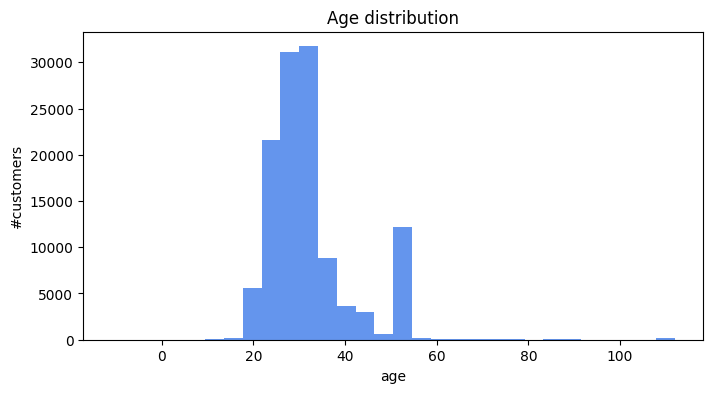

In [43]:
# Phan bo KH theo do tuoi

plt.figure(figsize=(8,4))
df_cus['age'].hist(bins = 30, color = 'cornflowerblue', grid=False)
plt.xlabel('age')
plt.ylabel('#customers')
plt.title('Age distribution')
plt.show()

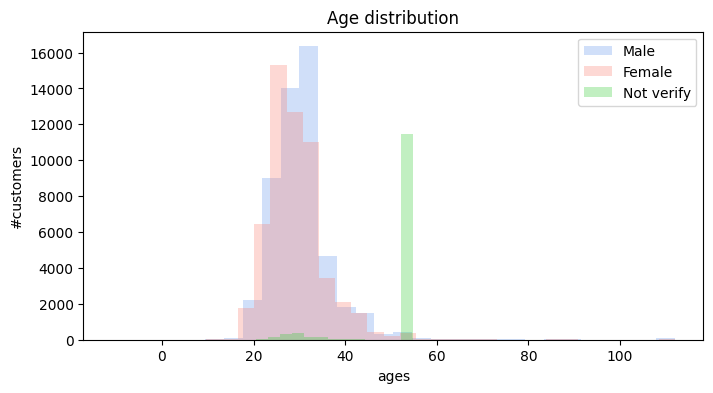

In [44]:
# Phan bo do tuoi theo nhom gioi tinh:

plt.figure(figsize=(8,4))

## data
male_age = df_cus[df_cus['usergender'] == 'Male']['age']
female_age = df_cus[df_cus['usergender'] == 'Female']['age']
unknown_age = df_cus[df_cus['usergender'] == 'Not verify']['age']

## plot
plt.hist(male_age, bins=30, alpha = 0.3, color = 'cornflowerblue', label = 'Male')
plt.hist(female_age, bins=30, alpha = 0.3, color = 'salmon', label = 'Female')
plt.hist(unknown_age, bins=30, alpha = 0.3, color = 'limegreen', label = 'Not verify')

##edit
plt.title('Age distribution')
plt.xlabel('ages')
plt.ylabel('#customers')
plt.legend()
plt.show()

In [45]:
# Danh gia chi tiet nhom Not Verify
df_gen = df_cus.groupby('usergender').agg(
    total = ('customer_id','count')
).reset_index().sort_values(by='total',ascending=False)

In [46]:
df_gen

,usergender,total
0,Female,55689
1,Male,50873
2,Not verify,12915


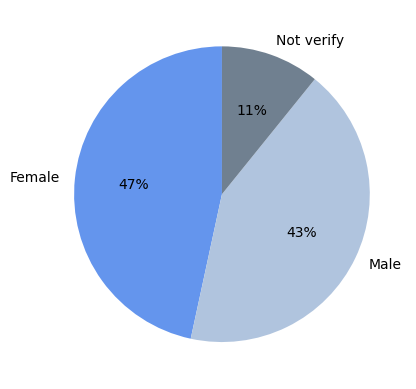

In [47]:
# Visualize

plt.pie(df_gen['total'], labels = df_gen['usergender'], colors=['cornflowerblue','lightsteelblue','slategrey'], autopct='%1.0f%%', startangle=90)
plt.show()

In [48]:
df_cus[df_cus['usergender'] == 'Not verify'].groupby('age').agg(
    number = ('customer_id','count')
).reset_index().sort_values(by='number',ascending=False).head(10)

,age,number
39,54,11435
14,29,125
15,30,118
13,28,116
11,26,116
12,27,112
16,31,105
17,32,100
10,25,92
19,34,87


>**Notes**

>- Nhóm KH chưa verify tài khoản chiếm hơn 10%. Dẫn tới 2 trường hợp:
>> - Nếu họ nhập dob thì sẽ có data
>> - Nếu họ không nhập thì hệ thống sẽ auto fill là 1970 --> 54 tuổi

#### **Age generation distribution**

In [49]:
df_cus.head(2)

,customer_id,dob,age,usergender
0,100009,1989-02-25,35,Male
1,100493,1991-06-09,33,Male


In [50]:
# Logic phan loai X, Y, Z, Baby boomers --> dua vao nam sinh

df_cus['age_generation'] = df_cus['dob'].apply(lambda x: 'baby boomers' if x.year < 1965 else 'gen X' if x.year < 1981 else 'gen Y' if x.year < 1997 else 'gen Z')

In [51]:
df_gen_group = df_cus[df_cus['usergender'] != 'Not verify'].groupby('age_generation').agg(
    total = ('customer_id','count')
).reset_index().sort_values(by='total',ascending=False)

In [52]:
df_gen_group

,age_generation,total
2,gen Y,63310
3,gen Z,38401
1,gen X,4261
0,baby boomers,590


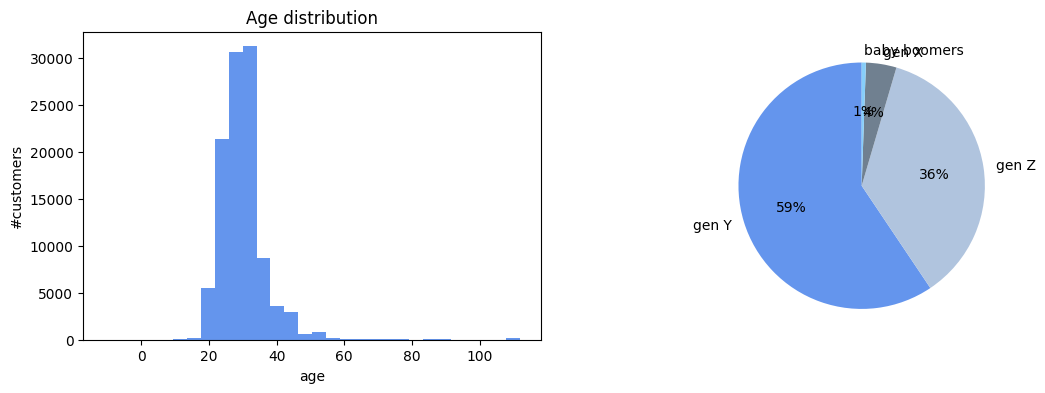

In [53]:
# Ket hop 2 bieu do cung luc:
plt.figure(figsize=(13, 4))

# Plot 1

ax1 = plt.subplot(1, 2, 1)
df_cus[df_cus['usergender']!='Not verify']['age'].hist(bins = 30, color = 'cornflowerblue', grid=False)
plt.xlabel('age')
plt.ylabel('#customers')
plt.title('Age distribution')

ax2 = plt.subplot(1, 2, 2)
plt.pie(df_gen_group['total'], labels = df_gen_group['age_generation'], colors=['cornflowerblue','lightsteelblue','slategrey', 'lightskyblue'], autopct='%1.0f%%', startangle=90)
plt.show()

### **3.2 Time series data - When did customers buy tickets?**

#### **Trend by month**

In [54]:
df_join_all.head(2)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,description,error_group,model,platform,age_days,age
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,Order successful,unknown,"iPhone13,1",mobile,12972,35
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,Order successful,unknown,browser,website,12138,33


In [55]:
df_join_all['month'] = pd.to_datetime(df_join_all['time']).dt.month
df_join_all['name_day'] = pd.to_datetime(df_join_all['time']).dt.day_name()
df_join_all['hour'] = pd.to_datetime(df_join_all['time']).dt.hour
df_join_all['year_month'] = df_join_all['time'].dt.strftime('%Y-%m')

In [56]:
# Thong ke theo thang
df_time_month = (
    df_join_all
    .groupby('year_month')
    .agg(total_ticket = ('ticket_id','count'))
    .reset_index()
)

In [57]:
df_time_month.head(10)

,year_month,total_ticket
0,2019-01,2019
1,2019-02,1626
2,2019-03,1004
3,2019-04,4069
4,2019-05,4430
5,2019-06,4387
6,2019-07,3872
7,2019-08,5444
8,2019-09,3278
9,2019-10,5284


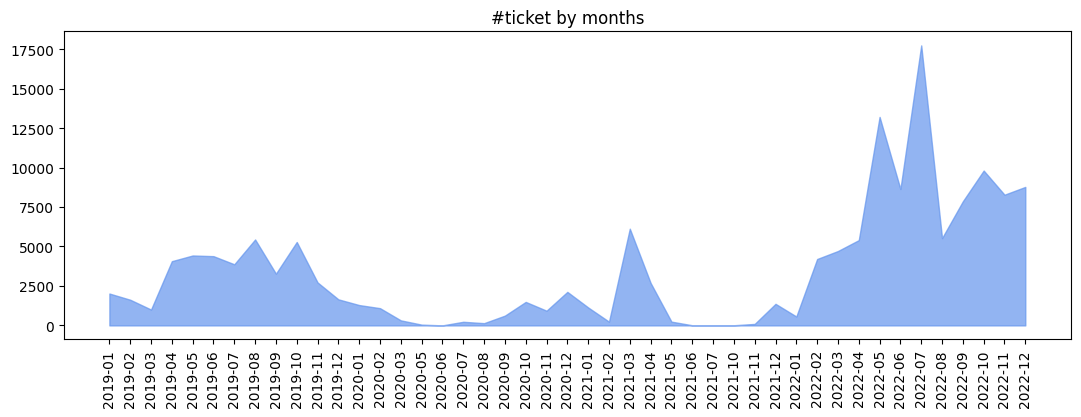

In [58]:
# Ve bieu do mien theo thang
plt.figure(figsize=(13,4))

plt.fill_between(df_time_month['year_month'], df_time_month['total_ticket'], color = 'cornflowerblue', alpha=0.7)
plt.title('#ticket by months')
plt.xticks(rotation=90)
plt.show()


In [59]:
## Giai đoạn covid diễn ra --> người ta không đi xem phim
# --> mình sẽ cần 1 bảng DIM thời gian theo tháng (FULL)

In [60]:
### tạo abngr DIM ime để JOIN lại với data ticket và vẽ lại chart

In [61]:
# Tạo bảng dimension thời gian:

# Xác định khoảng thời gian
start_date = '2019-01-01'
end_date = '2022-12-31'

# Tạo ra range thời gian từ 2 mốc start và end
date_range = pd.date_range(start=start_date, end=end_date, freq='MS')

# Lấy ra list phần tử thời gian tương ứng:
list_month = date_range.month
list_month_name = date_range.strftime('%B')
list_year = date_range.year
list_year_month = date_range.strftime('%Y-%m')

# # Khởi tạo dataframe
dim_time = pd.DataFrame({
    'month_number': list_month,
    'month_name': list_month_name,
    'year': list_year,
    'year_month': list_year_month
})

In [62]:
dim_time

,month_number,month_name,year,year_month
0,1,January,2019,2019-01
1,2,February,2019,2019-02
2,3,March,2019,2019-03
3,4,April,2019,2019-04
4,5,May,2019,2019-05
5,6,June,2019,2019-06
6,7,July,2019,2019-07
7,8,August,2019,2019-08
8,9,September,2019,2019-09
9,10,October,2019,2019-10


In [63]:
#JOIN với bảng df_join_all để mình có đủ data thời gian

df_time_month_dim = (
    pd.merge(dim_time, df_join_all, how = 'left', on = 'year_month')
    .groupby('year_month')
    .agg(total_ticket = ('ticket_id','count'))
    .reset_index()
)

In [64]:
df_time_month_dim.replace(0, np.nan, inplace=True)

In [65]:
df_time_month_dim

,year_month,total_ticket
0,2019-01,2019.0
1,2019-02,1626.0
2,2019-03,1004.0
3,2019-04,4069.0
4,2019-05,4430.0
5,2019-06,4387.0
6,2019-07,3872.0
7,2019-08,5444.0
8,2019-09,3278.0
9,2019-10,5284.0


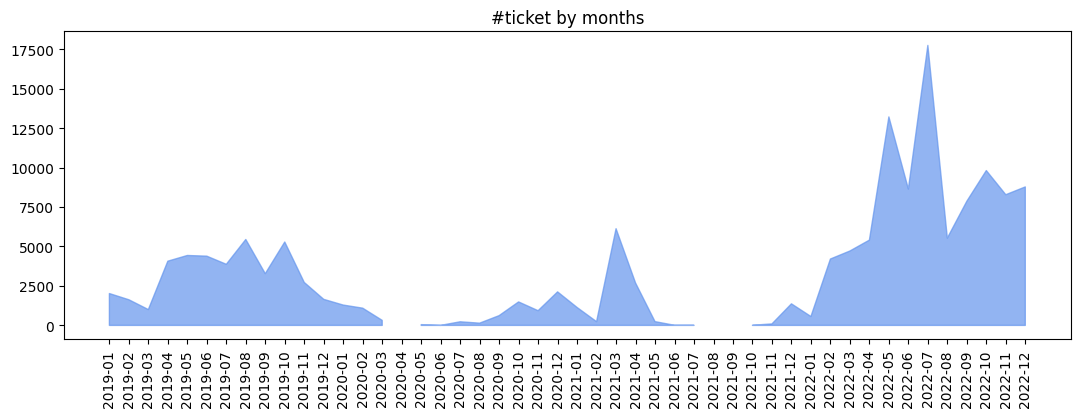

In [66]:
# Ve bieu do mien theo thang
plt.figure(figsize=(13,4))

plt.fill_between(df_time_month_dim['year_month'], df_time_month_dim['total_ticket'], color = 'cornflowerblue', alpha=0.7)
plt.title('#ticket by months')
plt.xticks(rotation=90)
plt.show()


#### **Trend by week days**

In [67]:
# Thong ke theo ngay trong tuan
df_week_day = (
    df_join_all
    .groupby('name_day').agg(total_ticket = ('ticket_id','count'))
    .reset_index()
)

In [68]:
df_week_day

,name_day,total_ticket
0,Friday,26438
1,Monday,16702
2,Saturday,34450
3,Sunday,26960
4,Thursday,19101
5,Tuesday,14793
6,Wednesday,16281


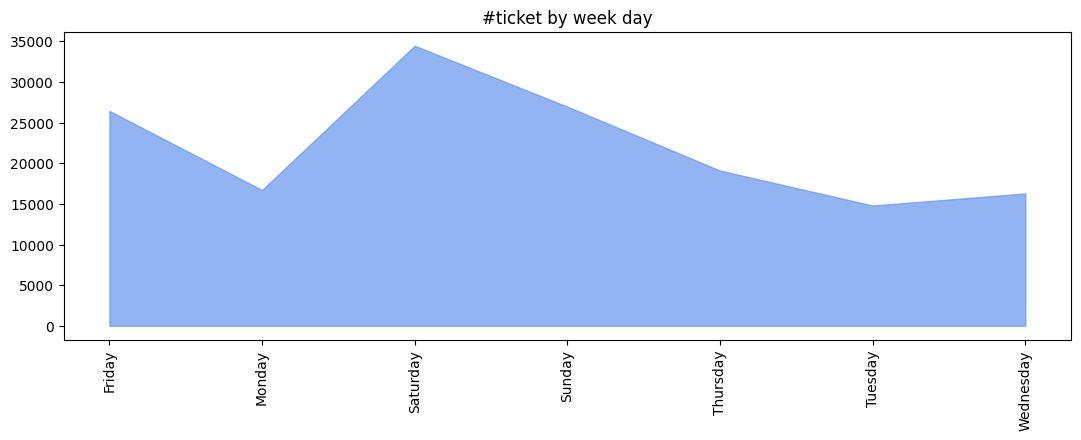

In [69]:
# Ve bieu do mien theo tuan
plt.figure(figsize=(13,4))

plt.fill_between(df_week_day['name_day'], df_week_day['total_ticket'], color = 'cornflowerblue', alpha=0.7)
plt.title('#ticket by week day')
plt.xticks(rotation=90)
plt.show()

In [70]:
# Dinh nghia thu tu cua cac ngay trong tuan
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Sap xep theo thu tu cac ngay trong tuan
df_week_day['day_order'] = pd.Categorical(df_week_day['name_day'], categories=week_order, ordered=True)
df_week_day.sort_values('day_order', inplace=True)

In [71]:
df_week_day

,name_day,total_ticket,day_order
1,Monday,16702,Monday
5,Tuesday,14793,Tuesday
6,Wednesday,16281,Wednesday
4,Thursday,19101,Thursday
0,Friday,26438,Friday
2,Saturday,34450,Saturday
3,Sunday,26960,Sunday


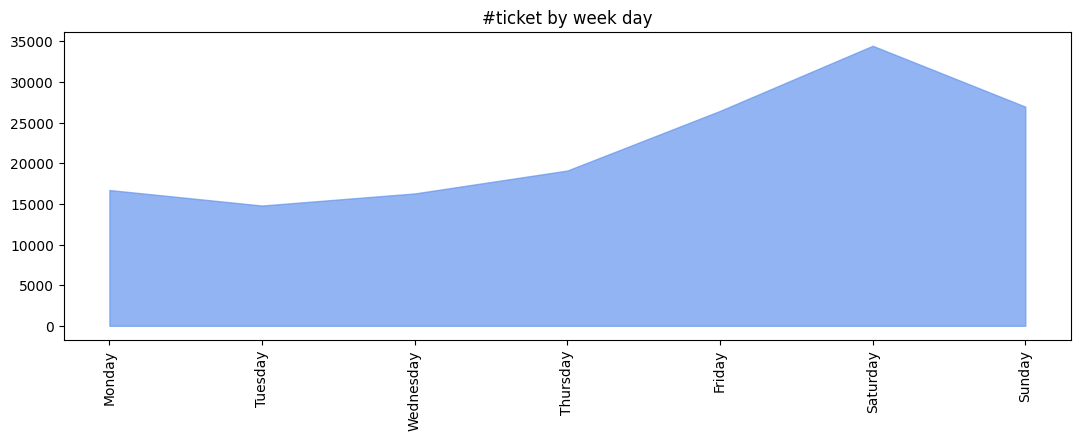

In [72]:
# Ve bieu do mien theo tuan
plt.figure(figsize=(13,4))

plt.fill_between(df_week_day['name_day'], df_week_day['total_ticket'], color = 'cornflowerblue', alpha=0.7)
plt.title('#ticket by week day')
plt.xticks(rotation=90)
plt.show()

#### **Trend by hours**

In [73]:
# Thong ke theo gio
df_hour = (
    df_join_all
    .groupby('hour').agg(total_ticket = ('ticket_id','count'))
    .reset_index()
)

In [74]:
df_hour

,hour,total_ticket
0,0,2352
1,1,964
2,2,398
3,3,159
4,4,74
5,5,146
6,6,536
7,7,1473
8,8,3865
9,9,7111


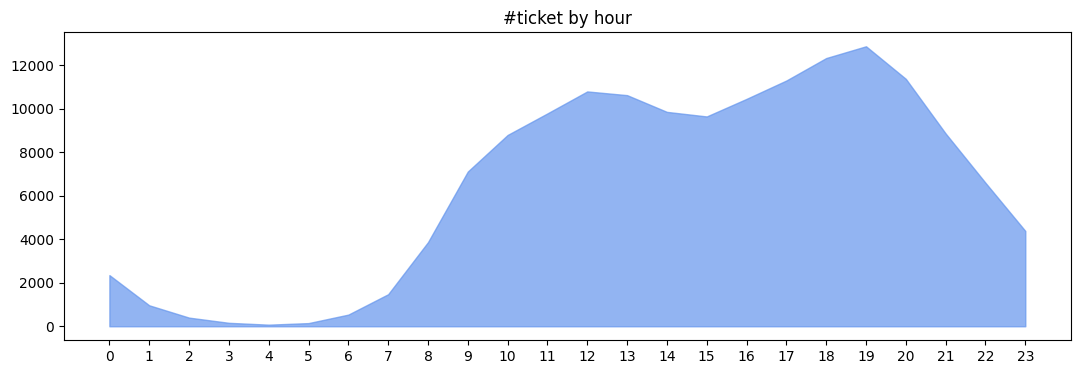

In [75]:
# Ve bieu do mien theo gio
plt.figure(figsize=(13,4))

plt.fill_between(df_hour['hour'], df_hour['total_ticket'], color = 'cornflowerblue', alpha=0.7)
x_values = [i for i in range(24)]
plt.title('#ticket by hour')
plt.xticks(x_values)
plt.show()

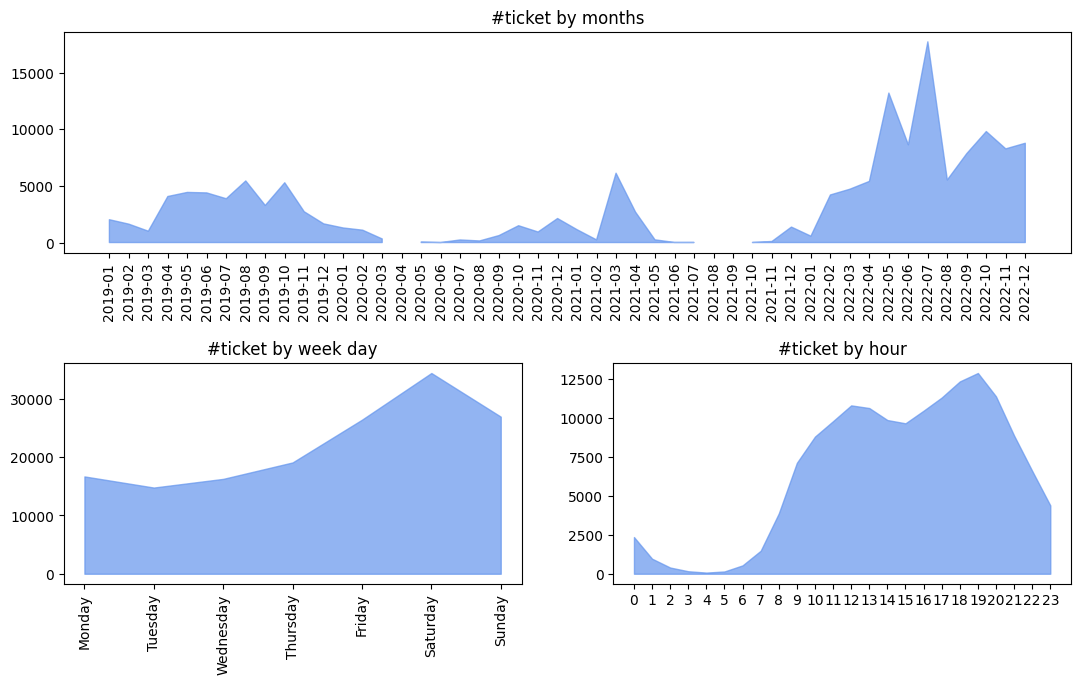

In [76]:
# Ve chung tren 1 frame:
plt.figure(figsize=(13,8))

# Chart 1: Thang
ax1 = plt.subplot(2, 1, 1)
plt.fill_between(df_time_month_dim['year_month'], df_time_month_dim['total_ticket'], color = 'cornflowerblue', alpha=0.7)
plt.title('#ticket by months')
plt.xticks(rotation=90)

# Chart 2: Ngay
ax2 = plt.subplot(2, 2, 3)
plt.fill_between(df_week_day['name_day'], df_week_day['total_ticket'], color = 'cornflowerblue', alpha=0.7)
plt.title('#ticket by week day')
plt.xticks(rotation=90)

# Chart 3: Gio
ax3 = plt.subplot(2, 2, 4)
plt.fill_between(df_hour['hour'], df_hour['total_ticket'], color = 'cornflowerblue', alpha=0.7)
x_values = [i for i in range(24)]
plt.title('#ticket by hour')
plt.xticks(x_values)

plt.subplots_adjust(hspace=0.5, top = 0.8)
plt.show()

### **3.3 Factors related to the customer's purchasing process**

#### **Payment platform**

In [77]:
df_join_all.head(2)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,description,error_group,model,platform,age_days,age,month,name_day,hour,year_month
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,Order successful,unknown,"iPhone13,1",mobile,12972,35,7,Friday,17,2022-07
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,Order successful,unknown,browser,website,12138,33,7,Friday,20,2022-07


In [78]:
df_platform = (
    df_join_all[df_join_all['platform'] != 'unknown']
    .groupby('platform').agg(total_ticket = ('ticket_id','count'))
    .reset_index()
)

In [79]:
df_platform

,platform,total_ticket
0,mobile,138136
1,website,16511


Text(0.5, 1.0, '#ticket by platform')

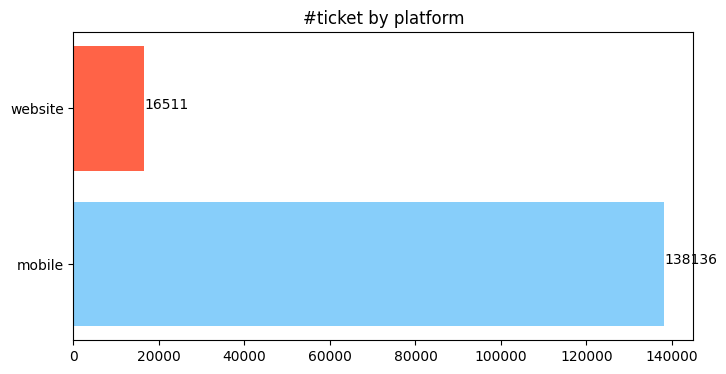

In [80]:
#  Bieu do cot ngang:
plt.figure(figsize=(8,4))

plt.barh(
    df_platform['platform'],
    df_platform['total_ticket'],
    color = df_platform['platform'].replace({'mobile':'lightskyblue','website':'tomato'})
)

for index, value in enumerate(df_platform['total_ticket']):
    plt.text(value, index, str(value))

plt.title('#ticket by platform')

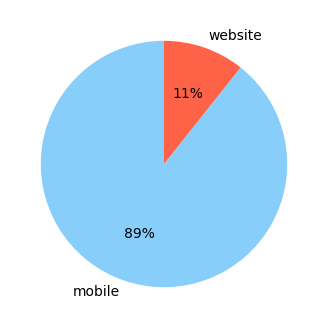

In [81]:
plt.figure(figsize=(6,4))
plt.pie(df_platform['total_ticket'], labels = df_platform['platform'], colors=['lightskyblue', 'tomato'], autopct='%1.0f%%', startangle=90)
plt.show()

In [82]:
# Theo thoi gian:
df_platform_time = (
    df_join_all[df_join_all['platform'] != 'unknown']
    .groupby(['year_month','platform']).agg(total_ticket = ('ticket_id','count'))
    .reset_index().sort_values(by='year_month')
)

In [83]:
df_platform_time.head(10)

,year_month,platform,total_ticket
0,2019-01,mobile,2019
1,2019-02,mobile,1626
2,2019-03,mobile,1004
3,2019-04,mobile,4069
4,2019-05,mobile,4430
5,2019-06,mobile,4387
6,2019-07,mobile,3872
7,2019-08,mobile,5444
8,2019-09,mobile,3278
9,2019-10,mobile,5284


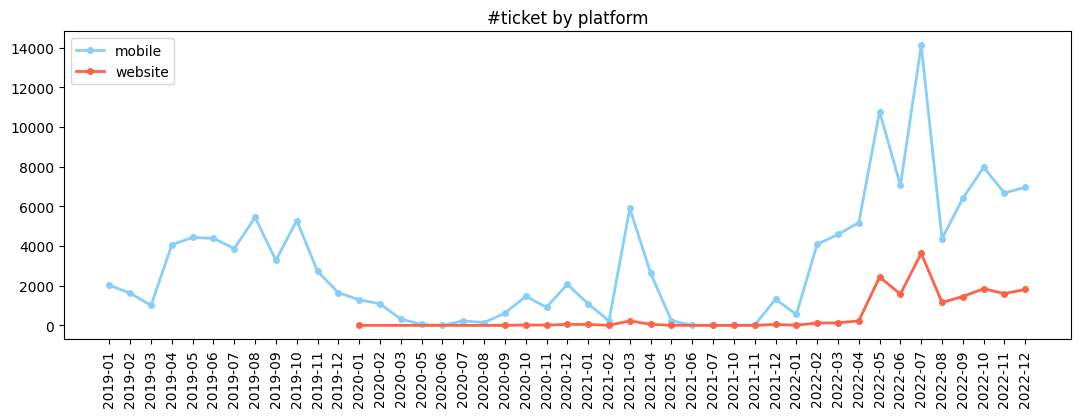

In [84]:
# Ve bieu do line chart

plt.figure(figsize=(13, 4))

df_mobile_line = df_platform_time[df_platform_time['platform'] == 'mobile']

plt.plot(df_mobile_line['year_month'], df_mobile_line['total_ticket'], label = 'mobile', color = 'lightskyblue', lw = 2, markersize=4, marker='o')

df_website_line = df_platform_time[df_platform_time['platform'] == 'website']
plt.plot(df_website_line['year_month'], df_website_line['total_ticket'], label = 'website', color = 'tomato', lw = 2, markersize=4, marker='o')

plt.title('#ticket by platform')

plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

#### **OS version**

In [85]:
df_join_all.head(2)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,description,error_group,model,platform,age_days,age,month,name_day,hour,year_month
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,Order successful,unknown,"iPhone13,1",mobile,12972,35,7,Friday,17,2022-07
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,Order successful,unknown,browser,website,12138,33,7,Friday,20,2022-07


In [86]:
# phan loai thiet bi OS version thanh cac nhom: android_others, ios, unknown, browser
df_join_all['os_version'] = df_join_all['model'].apply(lambda x: 'ios' if ('iPhone' in x or 'iPod' in x)
                                                       else 'browser' if x == 'browser'
                                                       else 'unknown' if ('devicemodel' in x or 'unknown' in x)
                                                       else 'android & other')

In [87]:
df_join_all['os_version'].unique()

array(['ios', 'browser', 'unknown', 'android & other'], dtype=object)

In [88]:
# Group by de thong ke ?

df_os = (
    df_join_all
    .groupby('os_version')
    .agg(total_ticket = ('ticket_id','count'))
    .reset_index().sort_values(by='total_ticket')
)

In [89]:
df_os

,os_version,total_ticket
1,browser,13377
0,android & other,21092
2,ios,51402
3,unknown,68854


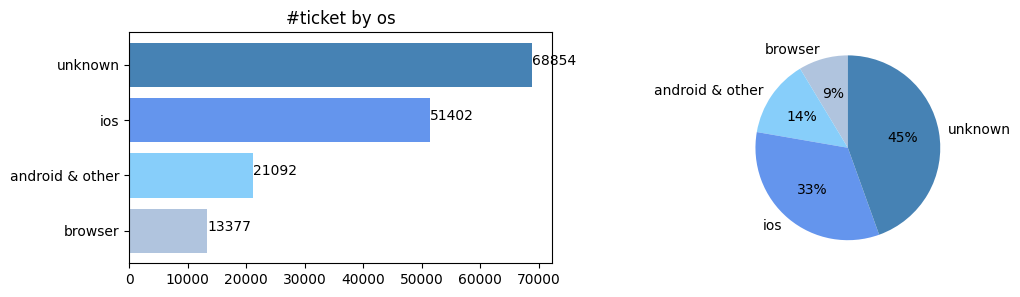

In [90]:
#  Bieu do cot ngang:
plt.figure(figsize=(12,3))

ax1 = plt.subplot(1, 2, 1)

plt.barh(
    df_os['os_version'],
    df_os['total_ticket'],
    color = df_os['os_version'].replace({'browser':'lightsteelblue','android & other':'lightskyblue','ios':'cornflowerblue','unknown':'steelblue'})
)

for index, value in enumerate(df_os['total_ticket']):
    plt.text(value, index, str(value))
plt.title('#ticket by os')

ax2 = plt.subplot(1, 2, 2)
plt.pie(df_os['total_ticket'],
        labels = df_os['os_version'],
        colors = df_os['os_version'].replace({'browser':'lightsteelblue','android & other':'lightskyblue','ios':'cornflowerblue','unknown':'steelblue'}),
        autopct='%1.0f%%',
        startangle=90)

plt.show()

In [91]:
# Theo thoi gian:
df_os_time = (
    df_join_all
    .groupby(['year_month','os_version'])
    .agg(total_ticket = ('ticket_id','count'))
    .reset_index().sort_values(by='year_month')
)

In [92]:
df_os_time.head(10)

,year_month,os_version,total_ticket
0,2019-01,android & other,713
1,2019-01,ios,1233
2,2019-01,unknown,73
3,2019-02,android & other,542
4,2019-02,ios,1074
5,2019-02,unknown,10
6,2019-03,android & other,371
7,2019-03,ios,631
8,2019-03,unknown,2
9,2019-04,android & other,1519


In [93]:
# Xu ly data dang PIVOT de ve bieu do mien:

df_os_time = (
    df_join_all
    .pivot_table(
        index = 'year_month',
        columns = 'os_version',
        values = 'ticket_id',
        aggfunc = 'count'
    )
    .reset_index()
)

In [94]:
df_os_time.head(10)

os_version,year_month,android & other,browser,ios,unknown
0,2019-01,713.0,NaN,1233.0,73.0
1,2019-02,542.0,NaN,1074.0,10.0
2,2019-03,371.0,NaN,631.0,2.0
3,2019-04,1519.0,NaN,2541.0,9.0
4,2019-05,1601.0,NaN,2826.0,3.0
5,2019-06,1575.0,NaN,2808.0,4.0
6,2019-07,1373.0,NaN,2499.0,NaN
7,2019-08,1797.0,NaN,3642.0,5.0
8,2019-09,1122.0,NaN,2151.0,5.0
9,2019-10,1964.0,NaN,3313.0,7.0


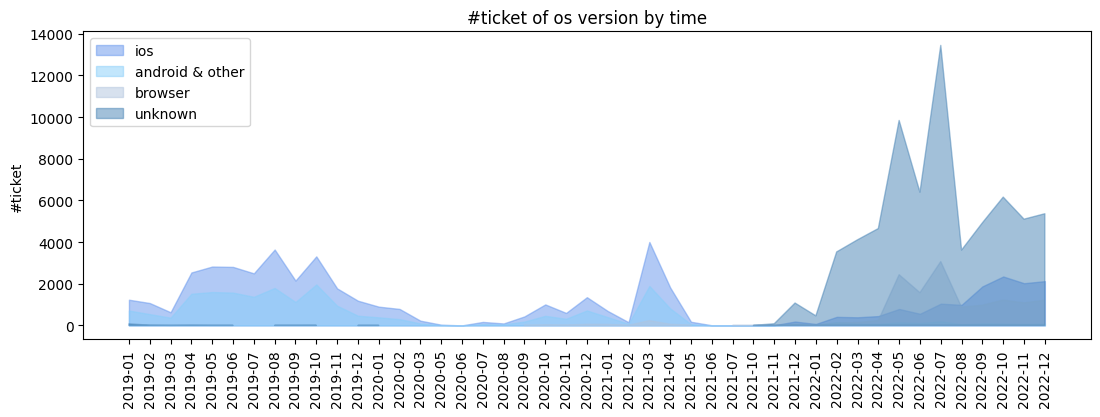

In [95]:
# Ve bieu do mien THOI GIAn
plt.figure(figsize=(13,4))
plt.fill_between(df_os_time['year_month'], df_os_time['ios'], color = 'cornflowerblue', alpha=0.5, label='ios')
plt.fill_between(df_os_time['year_month'], df_os_time['android & other'], color = 'lightskyblue', alpha=0.5, label='android & other')
plt.fill_between(df_os_time['year_month'], df_os_time['browser'], color = 'lightsteelblue', alpha=0.5, label='browser')
plt.fill_between(df_os_time['year_month'], df_os_time['unknown'], color = 'steelblue', alpha=0.5, label='unknown')

# Hien thi bieu do
plt.title('#ticket of os version by time')
# plt.xlabel('Month')
plt.ylabel('#ticket')
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

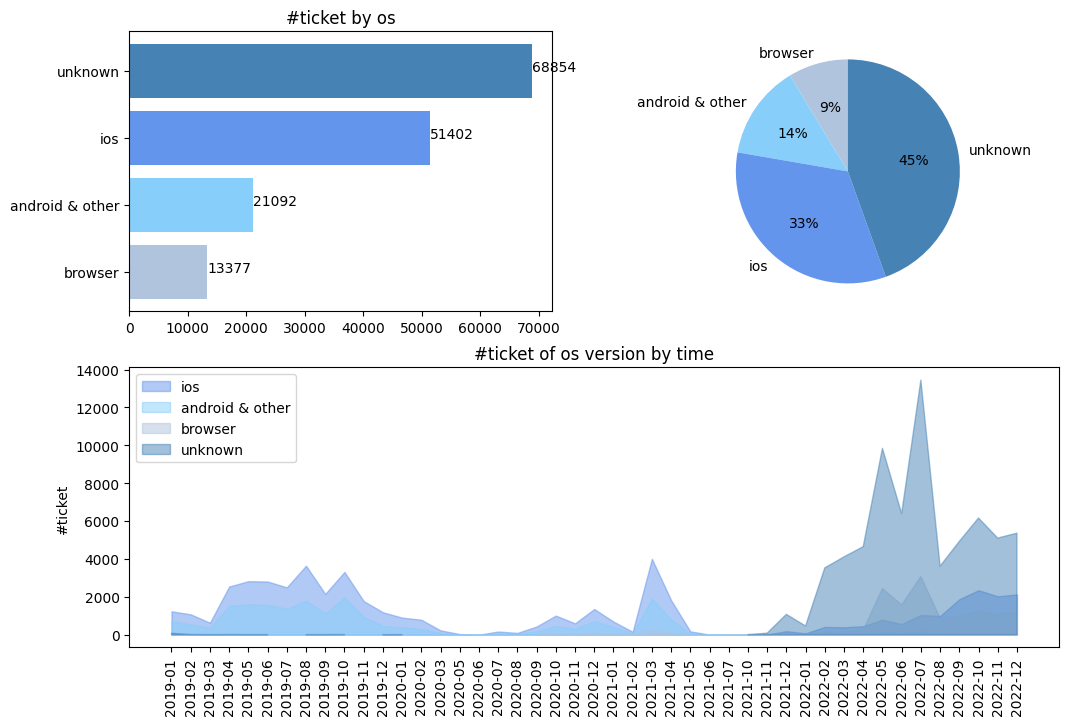

In [96]:
#  Bieu dien chung 1 frame
plt.figure(figsize=(12,8))

ax1 = plt.subplot(2, 2, 1)

plt.barh(
    df_os['os_version'],
    df_os['total_ticket'],
    color = df_os['os_version'].replace({'browser':'lightsteelblue','android & other':'lightskyblue','ios':'cornflowerblue','unknown':'steelblue'})
)

for index, value in enumerate(df_os['total_ticket']):
    plt.text(value, index, str(value))
plt.title('#ticket by os')

ax2 = plt.subplot(2, 2, 2)
plt.pie(df_os['total_ticket'],
        labels = df_os['os_version'],
        colors = df_os['os_version'].replace({'browser':'lightsteelblue','android & other':'lightskyblue','ios':'cornflowerblue','unknown':'steelblue'}),
        autopct='%1.0f%%',
        startangle=90)

ax3 = plt.subplot(2, 1, 2)
plt.fill_between(df_os_time['year_month'], df_os_time['ios'], color = 'cornflowerblue', alpha=0.5, label='ios')
plt.fill_between(df_os_time['year_month'], df_os_time['android & other'], color = 'lightskyblue', alpha=0.5, label='android & other')
plt.fill_between(df_os_time['year_month'], df_os_time['browser'], color = 'lightsteelblue', alpha=0.5, label='browser')
plt.fill_between(df_os_time['year_month'], df_os_time['unknown'], color = 'steelblue', alpha=0.5, label='unknown')

# Hien thi bieu do
plt.title('#ticket of os version by time')
# plt.xlabel('Month')
plt.ylabel('#ticket')
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

#### **Payment method**

In [97]:
df_join_all.head(2)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,description,error_group,model,platform,age_days,age,month,name_day,hour,year_month,os_version
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,Order successful,unknown,"iPhone13,1",mobile,12972,35,7,Friday,17,2022-07,ios
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,Order successful,unknown,browser,website,12138,33,7,Friday,20,2022-07,browser


In [98]:
df_method = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['paying_method'] != 'other')]
    .groupby('paying_method')
    .agg(total_ticket = ('ticket_id','count'))
    .reset_index().sort_values(by='total_ticket')
)

In [99]:
df_method

,paying_method,total_ticket
2,debit card,11395
1,credit card,15408
0,bank account,42057
3,money in app,64817


In [100]:
# Xu ly data dang PIVOT de ve bieu do mien:

df_method_time = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['paying_method'] != 'other')]
    .pivot_table(
        index = 'year_month',
        columns = 'paying_method',
        values = 'ticket_id',
        aggfunc = 'count'
    )
    .reset_index()
)

In [101]:
df_method_time.head(10)

paying_method,year_month,bank account,credit card,debit card,money in app
0,2019-01,487.0,336.0,93.0,443.0
1,2019-02,484.0,370.0,93.0,480.0
2,2019-03,304.0,225.0,74.0,263.0
3,2019-04,1050.0,705.0,189.0,1246.0
4,2019-05,1092.0,903.0,212.0,1410.0
5,2019-06,1074.0,962.0,249.0,1319.0
6,2019-07,916.0,782.0,252.0,1215.0
7,2019-08,1367.0,1142.0,321.0,1684.0
8,2019-09,774.0,711.0,219.0,1068.0
9,2019-10,1280.0,914.0,309.0,1833.0


([<matplotlib.patches.Wedge at 0x7d63b860bc40>,
 [Text(-0.29511260565569214, 1.0596737941381338, 'debit card'),
  Text(-0.9082952158462633, 0.620483521836632, 'credit card'),
  Text(-0.7070948555424657, -0.8426249849520129, 'bank account'),
  Text(1.0836255396019234, 0.18909175001157602, 'money in app')],
 [Text(-0.16097051217583205, 0.5780038877117093, '9%'),
  Text(-0.49543375409796175, 0.3384455573654356, '14%'),
  Text(-0.3856881030231631, -0.45961362815564333, '33%'),
  Text(0.5910684761465036, 0.10314095455176872, '45%')])

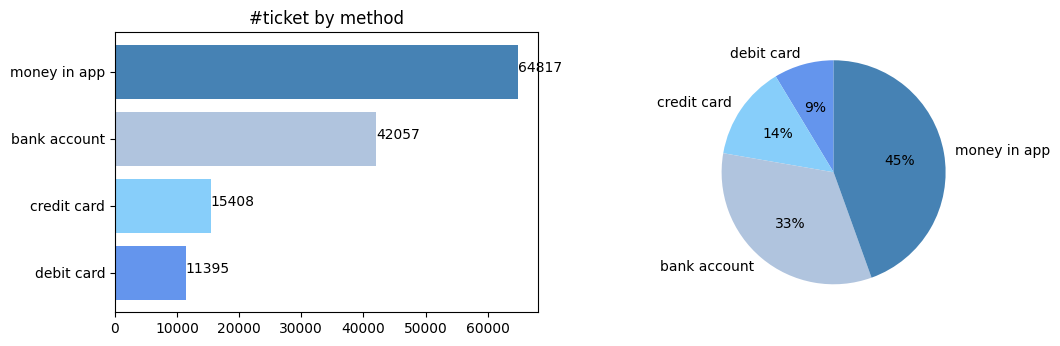

In [102]:
#  Bieu dien chung 1 frame
plt.figure(figsize=(12,8))

ax1 = plt.subplot(2, 2, 1)

plt.barh(
    df_method['paying_method'],
    df_method['total_ticket'],
    color = df_method['paying_method'].replace({'bank account':'lightsteelblue','credit card':'lightskyblue','debit card':'cornflowerblue','money in app':'steelblue'})
)

for index, value in enumerate(df_method['total_ticket']):
    plt.text(value, index, str(value))
plt.title('#ticket by method')

ax2 = plt.subplot(2, 2, 2)
plt.pie(df_os['total_ticket'],
        labels = df_method['paying_method'],
        colors = df_method['paying_method'].replace({'bank account':'lightsteelblue','credit card':'lightskyblue','debit card':'cornflowerblue','money in app':'steelblue'}),
        autopct='%1.0f%%',
        startangle=90)

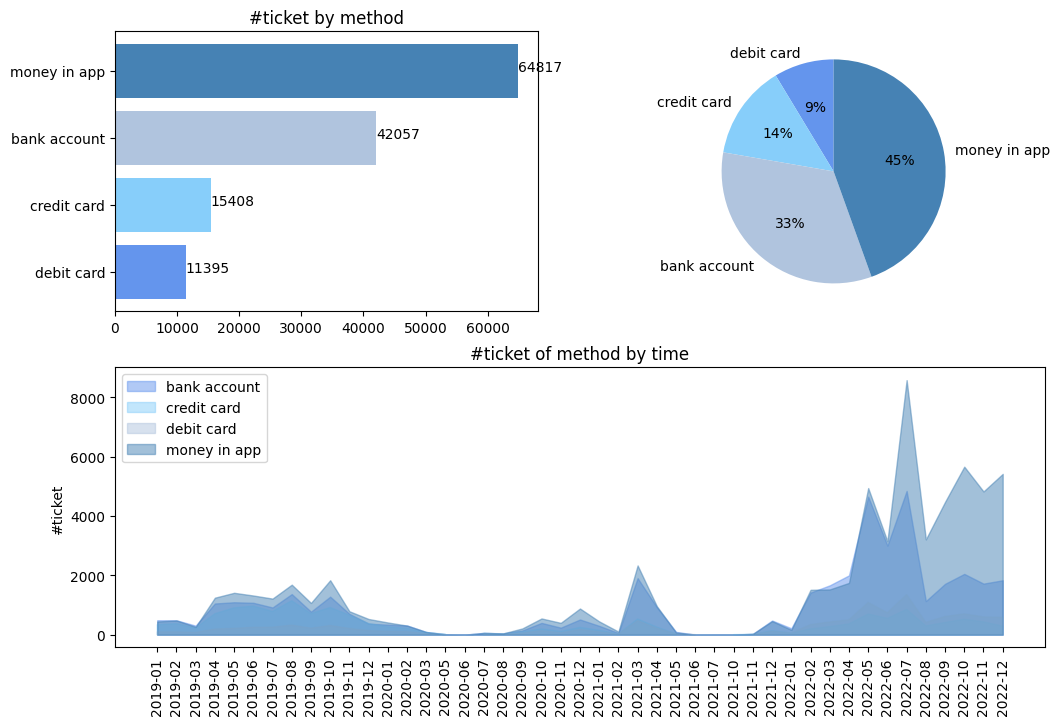

In [103]:
#  Bieu dien chung 1 frame
plt.figure(figsize=(12,8))

ax1 = plt.subplot(2, 2, 1)

plt.barh(
    df_method['paying_method'],
    df_method['total_ticket'],
    color = df_method['paying_method'].replace({'bank account':'lightsteelblue','credit card':'lightskyblue','debit card':'cornflowerblue','money in app':'steelblue'})
)

for index, value in enumerate(df_method['total_ticket']):
    plt.text(value, index, str(value))
plt.title('#ticket by method')

ax2 = plt.subplot(2, 2, 2)
plt.pie(df_os['total_ticket'],
        labels = df_method['paying_method'],
        colors = df_method['paying_method'].replace({'bank account':'lightsteelblue','credit card':'lightskyblue','debit card':'cornflowerblue','money in app':'steelblue'}),
        autopct='%1.0f%%',
        startangle=90)

ax3 = plt.subplot(2, 1, 2)
plt.fill_between(df_method_time['year_month'], df_method_time['bank account'], color = 'cornflowerblue', alpha=0.5, label='bank account')
plt.fill_between(df_method_time['year_month'], df_method_time['credit card'], color = 'lightskyblue', alpha=0.5, label='credit card')
plt.fill_between(df_method_time['year_month'], df_method_time['debit card'], color = 'lightsteelblue', alpha=0.5, label='debit card')
plt.fill_between(df_method_time['year_month'], df_method_time['money in app'], color = 'steelblue', alpha=0.5, label='money in app')

# Hien thi bieu do
plt.title('#ticket of method by time')
# plt.xlabel('Month')
plt.ylabel('#ticket')
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

In [104]:
# Bieu do mien 100%
df_method_time = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['paying_method'] != 'other')]
    .pivot_table(
        index = 'year_month',
        columns = 'paying_method',
        values = 'ticket_id',
        aggfunc = 'count'
    )
    .reset_index()
)

df_method_time_pct = df_method_time.copy()

df_method_time_pct = df_method_time_pct.fillna(0)

df_method_time_pct['total'] = df_method_time_pct.iloc[:, 1:].sum(axis=1)

for col in df_method_time_pct.columns[1:-1]:
    df_method_time_pct[col+'_pct'] = df_method_time_pct[col] / df_method_time_pct['total']

In [105]:
df_method_time_pct.head(10)

paying_method,year_month,bank account,credit card,debit card,money in app,total,bank account_pct,credit card_pct,debit card_pct,money in app_pct
0,2019-01,487.0,336.0,93.0,443.0,1359.0,0.358352,0.247241,0.068433,0.325975
1,2019-02,484.0,370.0,93.0,480.0,1427.0,0.339173,0.259285,0.065172,0.336370
2,2019-03,304.0,225.0,74.0,263.0,866.0,0.351039,0.259815,0.085450,0.303695
3,2019-04,1050.0,705.0,189.0,1246.0,3190.0,0.329154,0.221003,0.059248,0.390596
4,2019-05,1092.0,903.0,212.0,1410.0,3617.0,0.301908,0.249654,0.058612,0.389826
5,2019-06,1074.0,962.0,249.0,1319.0,3604.0,0.298002,0.266926,0.069090,0.365982
6,2019-07,916.0,782.0,252.0,1215.0,3165.0,0.289415,0.247077,0.079621,0.383886
7,2019-08,1367.0,1142.0,321.0,1684.0,4514.0,0.302836,0.252991,0.071112,0.373062
8,2019-09,774.0,711.0,219.0,1068.0,2772.0,0.279221,0.256494,0.079004,0.385281
9,2019-10,1280.0,914.0,309.0,1833.0,4336.0,0.295203,0.210793,0.071264,0.422740


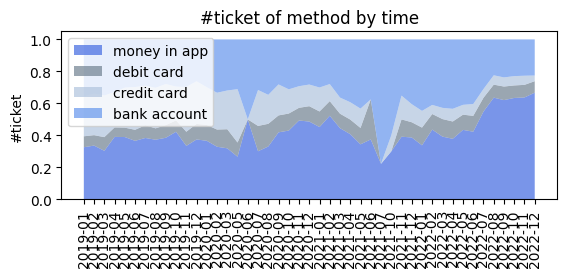

In [106]:
ax3 = plt.subplot(2, 1, 2)
# Ve bieu do mien 100%
plt.stackplot(df_method_time_pct['year_month'], df_method_time_pct['money in app_pct'], df_method_time_pct['debit card_pct'], df_method_time_pct['credit card_pct'], df_method_time_pct['bank account_pct'],
              colors = ['royalblue', 'slategrey', 'lightsteelblue', 'cornflowerblue'], alpha=0.7,
              labels = ['money in app', 'debit card', 'credit card', 'bank account'])

# Hien thi bieu do
plt.title('#ticket of method by time')
# plt.xlabel('Month')
plt.ylabel('#ticket')
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

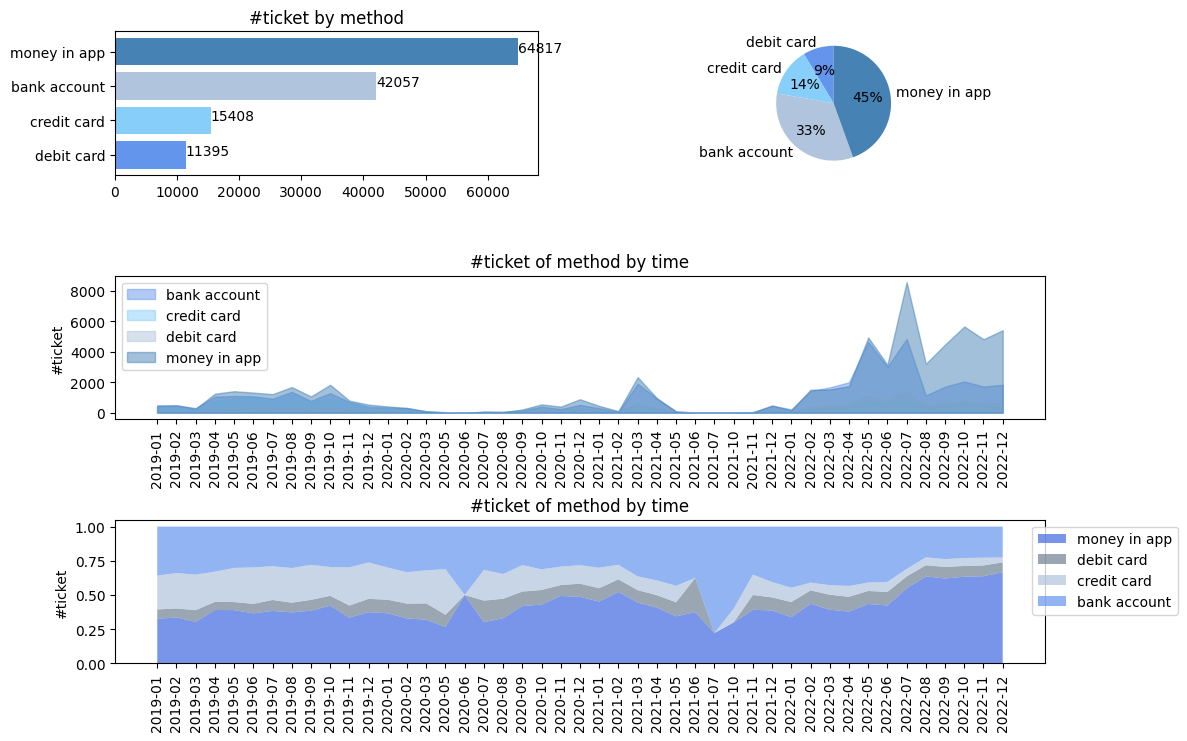

In [107]:
#  Bieu dien chung 1 frame
plt.figure(figsize=(12,8))

ax1 = plt.subplot(3, 2, 1)

plt.barh(
    df_method['paying_method'],
    df_method['total_ticket'],
    color = df_method['paying_method'].replace({'bank account':'lightsteelblue','credit card':'lightskyblue','debit card':'cornflowerblue','money in app':'steelblue'})
)

for index, value in enumerate(df_method['total_ticket']):
    plt.text(value, index, str(value))
plt.title('#ticket by method')

ax2 = plt.subplot(3, 2, 2)
plt.pie(df_os['total_ticket'],
        labels = df_method['paying_method'],
        colors = df_method['paying_method'].replace({'bank account':'lightsteelblue','credit card':'lightskyblue','debit card':'cornflowerblue','money in app':'steelblue'}),
        autopct='%1.0f%%',
        startangle=90)

ax3 = plt.subplot(3, 1, 2)
plt.fill_between(df_method_time['year_month'], df_method_time['bank account'], color = 'cornflowerblue', alpha=0.5, label='bank account')
plt.fill_between(df_method_time['year_month'], df_method_time['credit card'], color = 'lightskyblue', alpha=0.5, label='credit card')
plt.fill_between(df_method_time['year_month'], df_method_time['debit card'], color = 'lightsteelblue', alpha=0.5, label='debit card')
plt.fill_between(df_method_time['year_month'], df_method_time['money in app'], color = 'steelblue', alpha=0.5, label='money in app')
# Hien thi bieu do
plt.title('#ticket of method by time')
# plt.xlabel('Month')
plt.ylabel('#ticket')
plt.xticks(rotation=90)
plt.legend(loc='upper left')


ax4 = plt.subplot(3, 1, 3)
# Ve bieu do mien 100%
plt.stackplot(df_method_time_pct['year_month'], df_method_time_pct['money in app_pct'], df_method_time_pct['debit card_pct'], df_method_time_pct['credit card_pct'], df_method_time_pct['bank account_pct'],
              colors = ['royalblue', 'slategrey', 'lightsteelblue', 'cornflowerblue'], alpha=0.7,
              labels = ['money in app', 'debit card', 'credit card', 'bank account'])

# Hien thi bieu do
plt.title('#ticket of method by time')
# plt.xlabel('Month')
plt.ylabel('#ticket')
plt.xticks(rotation=90)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

plt.subplots_adjust(hspace=0.7, top = 0.9)

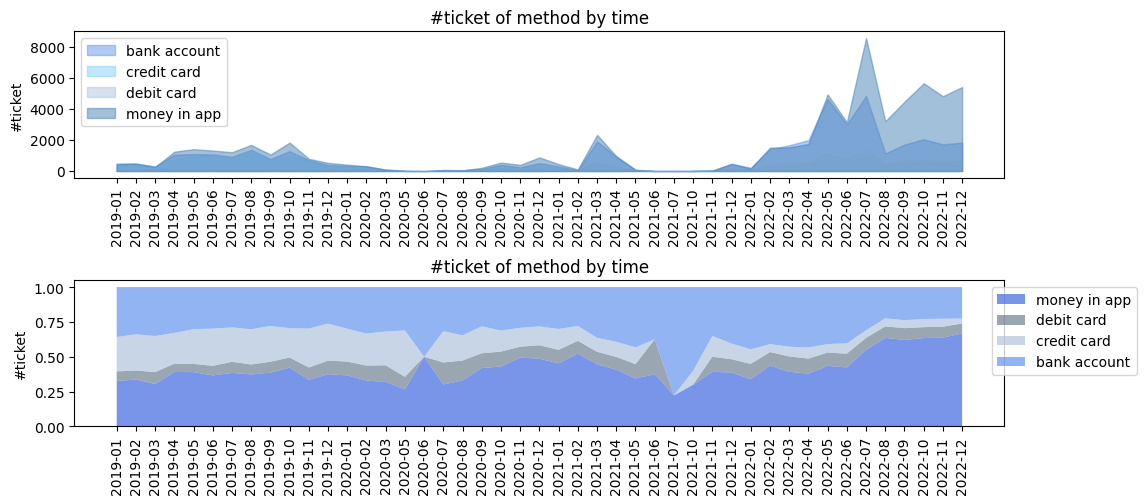

In [225]:
plt.figure(figsize=(12,5))
ax3 = plt.subplot(2, 1, 1)
plt.fill_between(df_method_time['year_month'], df_method_time['bank account'], color = 'cornflowerblue', alpha=0.5, label='bank account')
plt.fill_between(df_method_time['year_month'], df_method_time['credit card'], color = 'lightskyblue', alpha=0.5, label='credit card')
plt.fill_between(df_method_time['year_month'], df_method_time['debit card'], color = 'lightsteelblue', alpha=0.5, label='debit card')
plt.fill_between(df_method_time['year_month'], df_method_time['money in app'], color = 'steelblue', alpha=0.5, label='money in app')
# Hien thi bieu do
plt.title('#ticket of method by time')
# plt.xlabel('Month')
plt.ylabel('#ticket')
plt.xticks(rotation=90)
plt.legend(loc='upper left')


ax4 = plt.subplot(2, 1, 2)
# Ve bieu do mien 100%
plt.stackplot(df_method_time_pct['year_month'], df_method_time_pct['money in app_pct'], df_method_time_pct['debit card_pct'], df_method_time_pct['credit card_pct'], df_method_time_pct['bank account_pct'],
              colors = ['royalblue', 'slategrey', 'lightsteelblue', 'cornflowerblue'], alpha=0.7,
              labels = ['money in app', 'debit card', 'credit card', 'bank account'])

# Hien thi bieu do
plt.title('#ticket of method by time')
# plt.xlabel('Month')
plt.ylabel('#ticket')
plt.xticks(rotation=90)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

plt.subplots_adjust(hspace=0.7, top = 0.9)

#### **Promotion**

In [109]:
df_join_all['campaign_type'].unique()

array(['direct discount', 'unknown', 'voucher', 'reward point'],
      dtype=object)

In [110]:
df_join_all['type'] = df_join_all['campaign_type'].apply(lambda x: 'non-promotion' if x == 'unknown' else 'promotion')

In [111]:
df_join_all.head(2)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,description,error_group,model,platform,age_days,age,month,name_day,hour,year_month,os_version,type
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,Order successful,unknown,"iPhone13,1",mobile,12972,35,7,Friday,17,2022-07,ios,promotion
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,Order successful,unknown,browser,website,12138,33,7,Friday,20,2022-07,browser,promotion


In [112]:
df_type = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['paying_method'] != 'other')]
    .groupby('type')
    .agg(total_ticket = ('ticket_id','count'))
    .reset_index().sort_values(by='total_ticket')
)

In [113]:
df_type

,type,total_ticket
0,non-promotion,55155
1,promotion,78522


In [114]:
# Xu ly data dang PIVOT de ve bieu do mien:
df_type_time = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['paying_method'] != 'other')]
    .pivot_table(
        index = 'year_month',
        columns = 'type',
        values = 'ticket_id',
        aggfunc = 'count'
    )
    .reset_index()
)

df_type_time_pct = df_type_time.copy()

df_type_time_pct = df_type_time_pct.fillna(0)

df_type_time_pct['total'] = df_type_time_pct.iloc[:, 1:].sum(axis=1)

for col in df_type_time_pct.columns[1:-1]:
    df_type_time_pct[col+'_pct'] = df_type_time_pct[col] / df_type_time_pct['total']

In [115]:
df_type_time_pct.head(5)

type,year_month,non-promotion,promotion,total,non-promotion_pct,promotion_pct
0,2019-01,517.0,842.0,1359.0,0.380427,0.619573
1,2019-02,1335.0,92.0,1427.0,0.935529,0.064471
2,2019-03,835.0,31.0,866.0,0.964203,0.035797
3,2019-04,1699.0,1491.0,3190.0,0.532602,0.467398
4,2019-05,1564.0,2053.0,3617.0,0.432403,0.567597


([<matplotlib.patches.Wedge at 0x7d63b8328b20>,
 [Text(-1.0587935993929398, 0.2982551154373436, 'non-promotion'),
  Text(1.0587935993929398, -0.2982551154373433, 'promotion')],
 [Text(-0.577523781487058, 0.16268460842036925, '41%'),
  Text(0.577523781487058, -0.16268460842036905, '59%')])

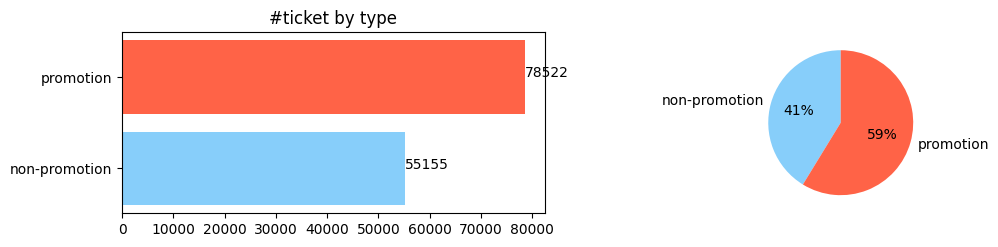

In [232]:
#  Bieu dien chung 1 frame
plt.figure(figsize=(12,8))

ax1 = plt.subplot(3, 2, 1)

plt.barh(
    df_type['type'],
    df_type['total_ticket'],
    color = df_type['type'].replace({'non-promotion':'lightskyblue','promotion':'tomato'})
)

for index, value in enumerate(df_type['total_ticket']):
    plt.text(value, index, str(value))
plt.title('#ticket by type')

ax2 = plt.subplot(3, 2, 2)
plt.pie(df_type['total_ticket'],
        labels = df_type['type'],
        colors = df_type['type'].replace({'non-promotion':'lightskyblue','promotion':'tomato'}),
        autopct='%1.0f%%',
        startangle=90)

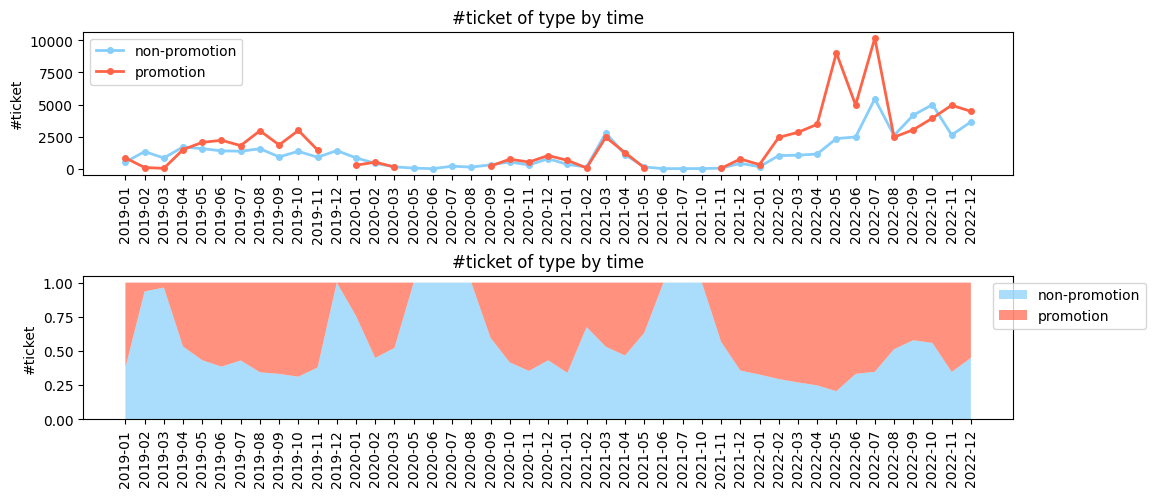

In [233]:
plt.figure(figsize=(12,8))

ax3 = plt.subplot(3, 1, 2)
plt.plot(df_type_time['year_month'], df_type_time['non-promotion'], label = 'non-promotion', color = 'lightskyblue', lw = 2, markersize=4, marker='o')
plt.plot(df_type_time['year_month'], df_type_time['promotion'], label = 'promotion', color = 'tomato', lw = 2, markersize=4, marker='o')

# Hien thi bieu do
plt.title('#ticket of type by time')
# plt.xlabel('Month')
plt.ylabel('#ticket')
plt.xticks(rotation=90)
plt.legend(loc='upper left')


ax4 = plt.subplot(3, 1, 3)
# Ve bieu do mien 100%
plt.stackplot(df_type_time_pct['year_month'], df_type_time_pct['non-promotion_pct'], df_type_time_pct['promotion_pct'],
              colors = ['lightskyblue', 'tomato'], alpha=0.7,
              labels = ['non-promotion', 'promotion'])

# Hien thi bieu do
plt.title('#ticket of type by time')
# plt.xlabel('Month')
plt.ylabel('#ticket')
plt.xticks(rotation=90)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

plt.subplots_adjust(hspace=0.7, top = 0.9)

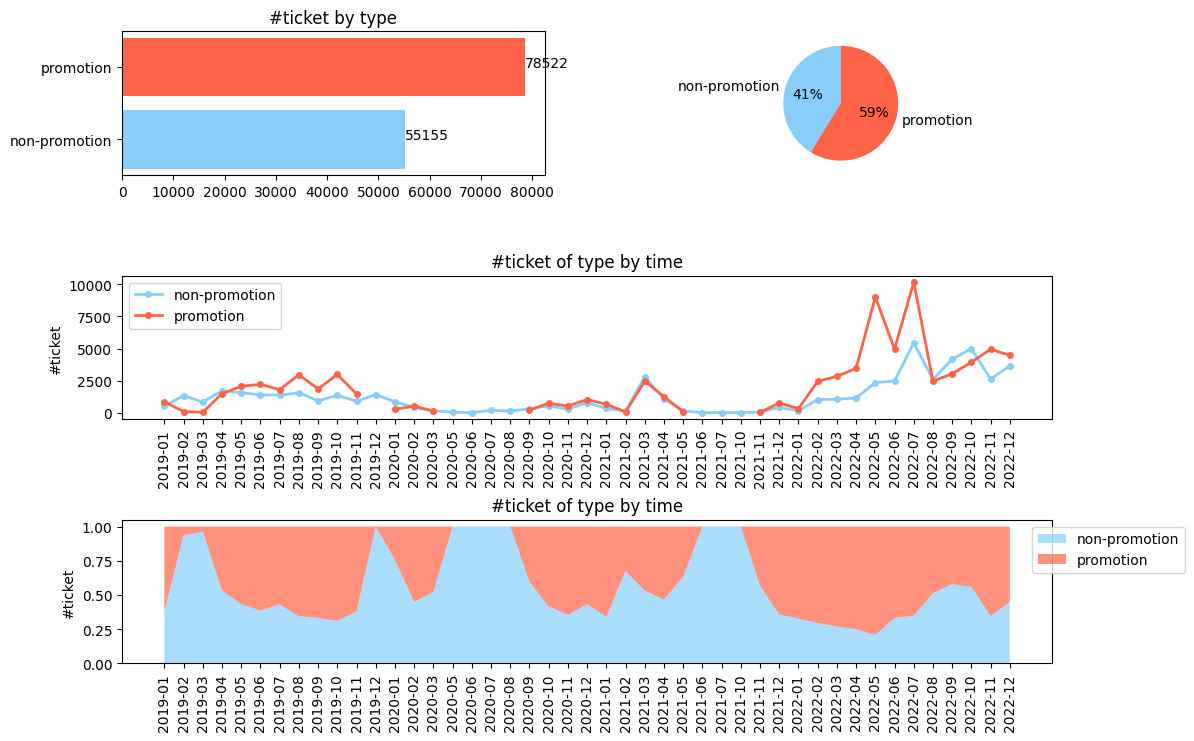

In [116]:
#  Bieu dien chung 1 frame
plt.figure(figsize=(12,8))

ax1 = plt.subplot(3, 2, 1)

plt.barh(
    df_type['type'],
    df_type['total_ticket'],
    color = df_type['type'].replace({'non-promotion':'lightskyblue','promotion':'tomato'})
)

for index, value in enumerate(df_type['total_ticket']):
    plt.text(value, index, str(value))
plt.title('#ticket by type')

ax2 = plt.subplot(3, 2, 2)
plt.pie(df_type['total_ticket'],
        labels = df_type['type'],
        colors = df_type['type'].replace({'non-promotion':'lightskyblue','promotion':'tomato'}),
        autopct='%1.0f%%',
        startangle=90)

ax3 = plt.subplot(3, 1, 2)
plt.plot(df_type_time['year_month'], df_type_time['non-promotion'], label = 'non-promotion', color = 'lightskyblue', lw = 2, markersize=4, marker='o')
plt.plot(df_type_time['year_month'], df_type_time['promotion'], label = 'promotion', color = 'tomato', lw = 2, markersize=4, marker='o')

# Hien thi bieu do
plt.title('#ticket of type by time')
# plt.xlabel('Month')
plt.ylabel('#ticket')
plt.xticks(rotation=90)
plt.legend(loc='upper left')


ax4 = plt.subplot(3, 1, 3)
# Ve bieu do mien 100%
plt.stackplot(df_type_time_pct['year_month'], df_type_time_pct['non-promotion_pct'], df_type_time_pct['promotion_pct'],
              colors = ['lightskyblue', 'tomato'], alpha=0.7,
              labels = ['non-promotion', 'promotion'])

# Hien thi bieu do
plt.title('#ticket of type by time')
# plt.xlabel('Month')
plt.ylabel('#ticket')
plt.xticks(rotation=90)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

plt.subplots_adjust(hspace=0.7, top = 0.9)

In [117]:
df_type_time.head(2)

type,year_month,non-promotion,promotion
0,2019-01,517.0,842.0
1,2019-02,1335.0,92.0


#### **Which movies they watched?**

In [118]:
df_film_sum = (
    df_join_all[df_join_all['status_id'] == 1]
    .groupby('movie_name')
    .agg(total_ticket = ('ticket_id','count'),
         total_customer = ('customer_id','nunique'),
         revenue = ('final_price', 'sum'))
    .reset_index().sort_values(by='total_ticket', ascending=False)
)

In [119]:
df_film_sum.head(30)

,movie_name,total_ticket,total_customer,revenue
63,Doctor Strange In The Multiverse Of Madness,8615,8409,65579.98
136,Minions: The Rise Of Gru,7224,7014,56530.93
21,Avatar: The Way Of Water,5870,5612,59830.95
230,Thor: Love And Thunder,5589,5478,43372.90
158,Peninsula,5499,5365,41208.44
28,Black Panther 2: Wakanda Forever,3847,3790,26860.28
27,Black Adam,3229,3186,23159.34
22,Avengers: Endgame,3219,3135,26690.48
49,Dad I'm Sorry,3023,2817,25863.28
128,Love Destiny,2411,2376,18345.61


In [120]:
list_film = df_film_sum[df_film_sum['total_ticket'] > 1000]['movie_name'].unique()
list_selected_film = list(list_film)

In [121]:
list_selected_film

['Doctor Strange In The Multiverse Of Madness',
 'Minions: The Rise Of Gru',
 'Avatar: The Way Of Water',
 'Thor: Love And Thunder',
 'Peninsula',
 'Black Panther 2: Wakanda Forever',
 'Black Adam',
 'Avengers: Endgame',
 "Dad I'm Sorry",
 'Love Destiny',
 'You And Trinh',
 'Fast & Furious Presents: Hobbs & Shaw',
 'Emergency Declaration',
 'Jurassic World Dominion',
 'Godzilla Vs. Kong',
 'Detective Conan: The Bride Of Halloween',
 'Joker',
 'Spider-Man: No Way Home',
 'Batman',
 'Blood Moon Party',
 'Fantastic Beasts: Secrets Of Dumbledore',
 'Top Gun: Maverick',
 'Naked Truth',
 "Doraemon: Nobita's Little Star Wars 2021",
 'One Piece Film: Red',
 'Confidential Assignment 2: International',
 'Extremely Easy Job',
 'Morbius',
 'Spider-Man Far From Home',
 'Maleficent',
 'Face Off: 48h',
 'Parasite']

In [122]:
df_movie_time_pivot = (
    df_join_all[(df_join_all['status_id']==1) & (df_join_all['movie_name'].isin(list_selected_film))]
    .pivot_table(
        index = 'year_month',
        columns = 'movie_name',
        values = 'ticket_id',
        aggfunc = 'count'
)).reset_index()

In [123]:
df_movie_time_pivot.head(10)

movie_name,year_month,Avatar: The Way Of Water,Avengers: Endgame,Batman,Black Adam,Black Panther 2: Wakanda Forever,Blood Moon Party,Confidential Assignment 2: International,Dad I'm Sorry,Detective Conan: The Bride Of Halloween,Doctor Strange In The Multiverse Of Madness,Doraemon: Nobita's Little Star Wars 2021,Emergency Declaration,Extremely Easy Job,Face Off: 48h,Fantastic Beasts: Secrets Of Dumbledore,Fast & Furious Presents: Hobbs & Shaw,Godzilla Vs. Kong,Joker,Jurassic World Dominion,Love Destiny,Maleficent,Minions: The Rise Of Gru,Morbius,Naked Truth,One Piece Film: Red,Parasite,Peninsula,Spider-Man Far From Home,Spider-Man: No Way Home,Thor: Love And Thunder,Top Gun: Maverick,You And Trinh
0,2019-04,NaN,2081.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-05,NaN,1130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-06,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,751.0,NaN,28.0,NaN,NaN,NaN,NaN
3,2019-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286.0,NaN,1125.0,NaN,NaN,NaN,NaN
4,2019-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1405.0,NaN,NaN,1008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2019-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2020-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN
9,2020-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN


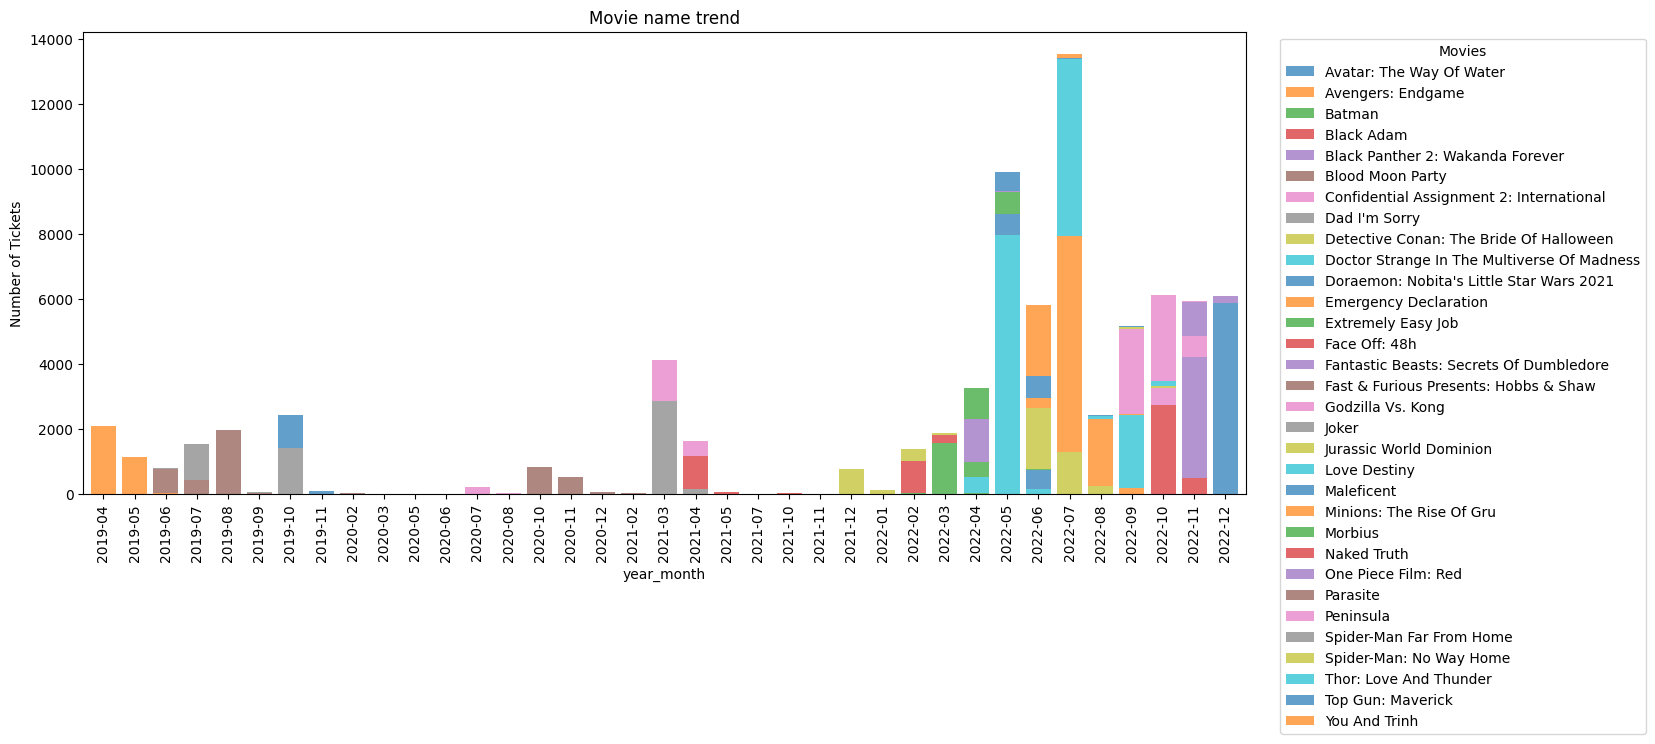

In [124]:
# Bieu do bar cot chong len nhau:
ax = df_movie_time_pivot.plot(x = 'year_month', kind='bar', stacked=True, figsize=(15, 6), width=0.8, alpha = 0.7)

# Set the title and labels
ax.set_title('Movie name trend')
# ax.set_xlabel('Month')
ax.set_ylabel('Number of Tickets')

# Add a legend
plt.legend(title='Movies', loc='upper right', bbox_to_anchor=(1.35, 1))

# Show the plot
plt.show()

### **3.4 Customer value dimension**

>- **Mục tiêu: Phân tích các chỉ số về giá trị mà 1 khách hàng mang lại**
>> - **Frequency**: count, day, month
>> - **Monetary**: total_money, total_discount
>> - **Success rate** = number_success / total
>> - **Promotion_rate** = number_promotion / total_success
>> - **Discount_rate** = sum_discount / sum_money

In [125]:
df_join_all.head(2)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,description,error_group,model,platform,age_days,age,month,name_day,hour,year_month,os_version,type
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,Order successful,unknown,"iPhone13,1",mobile,12972,35,7,Friday,17,2022-07,ios,promotion
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,Order successful,unknown,browser,website,12138,33,7,Friday,20,2022-07,browser,promotion


In [126]:
# Tính tất cả các chỉ số trên:

# Tính các chỉ số cho những ves thanh toán thành công

def calculate_n_promotion(x):
  return (x == 'promotion').sum()

df_success_metric = (
    df_join_all[df_join_all['status_id'] == 1]
    .assign(date = pd.to_datetime(df_join_all['time']).dt.date)
    .groupby('customer_id')
    .agg(
        n_success = ('ticket_id','count'),
        s_money = ('original_price', 'sum'),
        s_discount = ('discount_value', 'sum'),
        n_days = ('date','nunique'),
        n_months = ('month','nunique'),
        n_promotions = ('type', calculate_n_promotion)
      )
    .reset_index()
)

In [127]:
# Tính các chỉ số: total và số giao dịch lỗi:

def calculate_n_failed(x):
  return (x != 1).sum() # bien status_id != 1

df_failed_metric = (
    df_join_all
    .groupby('customer_id')
    .agg(
        n_total = ('ticket_id','count'),
        n_failed = ('status_id', calculate_n_failed)
      )
    .reset_index()
)

In [128]:
df_success_metric.head(2)

,customer_id,n_success,s_money,s_discount,n_days,n_months,n_promotions
0,100001,1,7.42,2.06,1,1,1
1,100003,6,60.95,2.56,6,6,1


In [129]:
df_failed_metric.head(2)

,customer_id,n_total,n_failed
0,100001,1,0
1,100003,6,0


In [130]:
# join 2 bảng này lại:

df_customer_value = (
    pd.merge(df_failed_metric, df_success_metric, how = 'left', on = 'customer_id')
    .fillna(0)
)

In [131]:
df_customer_value.head(5)

,customer_id,n_total,n_failed,n_success,s_money,s_discount,n_days,n_months,n_promotions
0,100001,1,0,1.0,7.42,2.06,1.0,1.0,1.0
1,100003,6,0,6.0,60.95,2.56,6.0,6.0,1.0
2,100004,1,0,1.0,32.25,0.00,1.0,1.0,0.0
3,100005,1,0,1.0,9.49,2.06,1.0,1.0,1.0
4,100006,1,0,1.0,12.37,0.00,1.0,1.0,0.0


In [132]:
df_customer_value['success_rate'] = df_customer_value['n_success'] / df_customer_value['n_total']
df_customer_value['promotion_rate'] = df_customer_value['n_promotions'] / df_customer_value['n_success']
df_customer_value['discount_rate'] = df_customer_value['s_discount'] / df_customer_value['s_money']

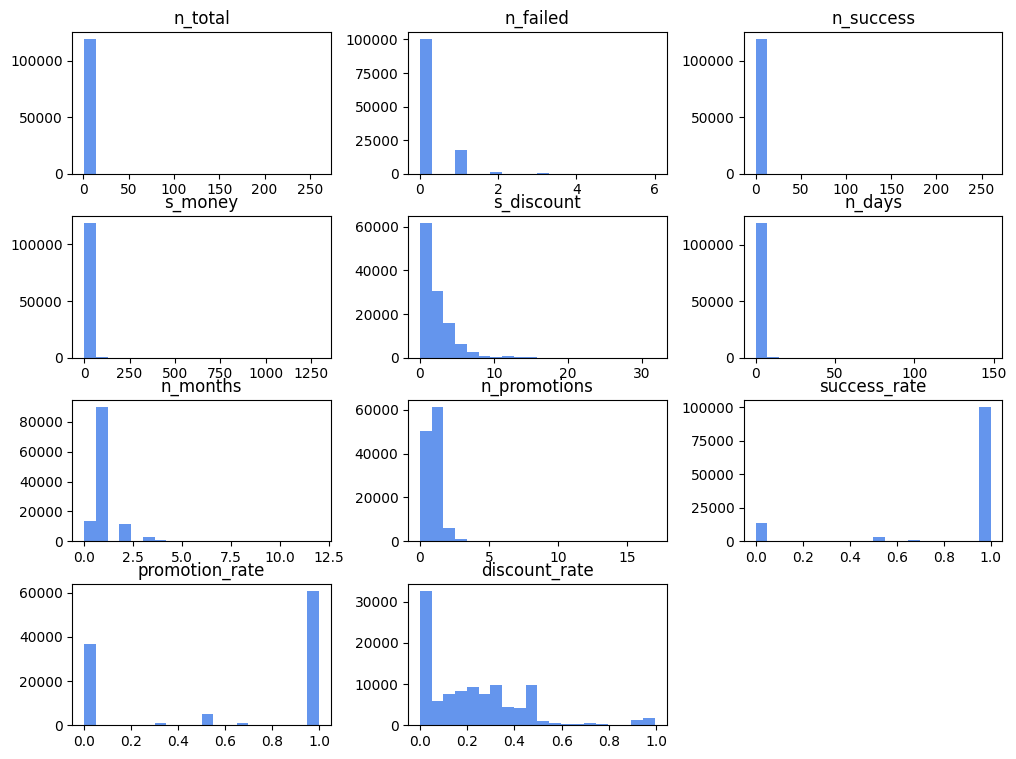

In [133]:
# Visualize tất cả các chỉ số bằng histogram

df_customer_value.iloc[:, 1:].hist(figsize=(12,9), grid=False, bins=20, color = 'cornflowerblue')
plt.show()

>- **Notes:**
>> - **n_total:** Hầu hết KH mua vé rất ít (1-2 vé) nhưng có top những người mua rất nhiều --> check những người này.
>> - **success_rate:** Có khoảng ~10% giao dịch SR = 0% --> Lỗi ?
>> - **promotion_rate:** Có hơn 60000 KH chỉ tham gia promotion (rate = 100%)
>> - **n_promotions:** 60000 KH chỉ hưởng promotion 1 lần (có liên quan gì đến nhóm ở promotion_rate = 100%) ?

#### **Frequency & anomaly behavior**

In [134]:
df_customer_value['n_order_dis'] = df_customer_value['n_success'].apply(lambda x : 'more than 10' if x >= 10 else str(x))

In [135]:
df_customer_value.head(2)

,customer_id,n_total,n_failed,n_success,s_money,s_discount,n_days,n_months,n_promotions,success_rate,promotion_rate,discount_rate,n_order_dis
0,100001,1,0,1.0,7.42,2.06,1.0,1.0,1.0,1.0,1.000000,0.277628,1.0
1,100003,6,0,6.0,60.95,2.56,6.0,6.0,1.0,1.0,0.166667,0.042002,6.0


In [136]:
df_n_dis = df_customer_value.groupby('n_order_dis').agg(total_customer = ('customer_id','count')).reset_index()

In [137]:
df_n_dis

,n_order_dis,total_customer
0,0.0,13701
1,1.0,87921
2,2.0,12902
3,3.0,3145
4,4.0,1017
5,5.0,380
6,6.0,168
7,7.0,92
8,8.0,47
9,9.0,30


Text(0.5, 1.0, '#customer of each group')

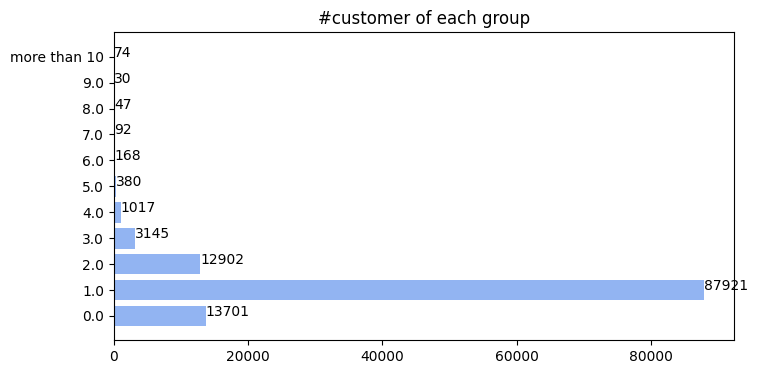

In [138]:
#  Bieu do cot ngang:
plt.figure(figsize=(8,4))

plt.barh(
    df_n_dis['n_order_dis'],
    df_n_dis['total_customer'],
    color =  'cornflowerblue',
    alpha = 0.7
)

for index, value in enumerate(df_n_dis['total_customer']):
    plt.text(value, index, str(value))

plt.title('#customer of each group')

In [139]:
df_customer_value.count()

,0
customer_id,119477
n_total,119477
n_failed,119477
n_success,119477
s_money,119477
s_discount,119477
n_days,119477
n_months,119477
n_promotions,119477
success_rate,119477


In [140]:
# Nếu họ mua dồn vào 1 lúc --> Bất thường
# Nếu mua dàn trải : --> Bình thường

In [141]:
df_customer_value.sort_values(by='n_success', ascending=False).head(20)

,customer_id,n_total,n_failed,n_success,s_money,s_discount,n_days,n_months,n_promotions,success_rate,promotion_rate,discount_rate,n_order_dis
2686,102948,260,0,260.0,1291.25,3.38,148.0,12.0,1.0,1.000000,0.003846,0.002618,more than 10
48948,153588,108,1,107.0,434.59,0.00,77.0,11.0,0.0,0.990741,0.000000,0.000000,more than 10
10604,111644,104,0,104.0,581.70,18.52,85.0,11.0,9.0,1.000000,0.086538,0.031838,more than 10
15783,117362,104,1,103.0,744.86,8.62,79.0,10.0,6.0,0.990385,0.058252,0.011573,more than 10
16687,118349,83,3,80.0,344.56,4.21,62.0,12.0,1.0,0.963855,0.012500,0.012218,more than 10
20907,122962,77,1,76.0,447.00,1.86,45.0,9.0,3.0,0.987013,0.039474,0.004161,more than 10
72718,179471,69,1,68.0,375.91,7.14,51.0,8.0,4.0,0.985507,0.058824,0.018994,more than 10
62432,168132,69,3,66.0,249.03,0.00,59.0,9.0,0.0,0.956522,0.000000,0.000000,more than 10
111563,222641,51,0,51.0,240.84,2.31,41.0,11.0,3.0,1.000000,0.058824,0.009591,more than 10
53097,158089,53,2,51.0,245.14,1.69,40.0,12.0,2.0,0.962264,0.039216,0.006894,more than 10


In [142]:
list_customer_massive = list(df_customer_value[df_customer_value['n_success'] > 30]['customer_id'].unique())

In [143]:
list_customer_massive

[102948,
 103035,
 103347,
 108110,
 108162,
 108729,
 111644,
 114205,
 117140,
 117362,
 117475,
 118349,
 122962,
 131905,
 153124,
 153588,
 158089,
 168132,
 179471,
 222641,
 226527,
 226886]

In [144]:
df_customer_massive_pivot = (
    df_join_all[(df_join_all['customer_id'].isin(list_customer_massive)) & (df_join_all['status_id']==1)]
    .pivot_table(
        index = 'year_month',
        columns = 'customer_id',
        values = 'ticket_id',
        aggfunc = 'count'
    )
    .reset_index()
)

In [145]:
df_customer_massive_pivot

customer_id,year_month,102948,103035,103347,108110,108162,108729,111644,114205,117140,117362,117475,118349,122962,131905,153124,153588,158089,168132,179471,222641,226527,226886
0,2019-01,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-04,NaN,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN
4,2019-05,NaN,2.0,NaN,NaN,4.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,2.0,3.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN
5,2019-06,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,1.0,NaN,1.0,NaN,NaN,1.0,7.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN
6,2019-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN
7,2019-08,NaN,3.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,1.0,7.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN
8,2019-09,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN
9,2019-10,NaN,4.0,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN


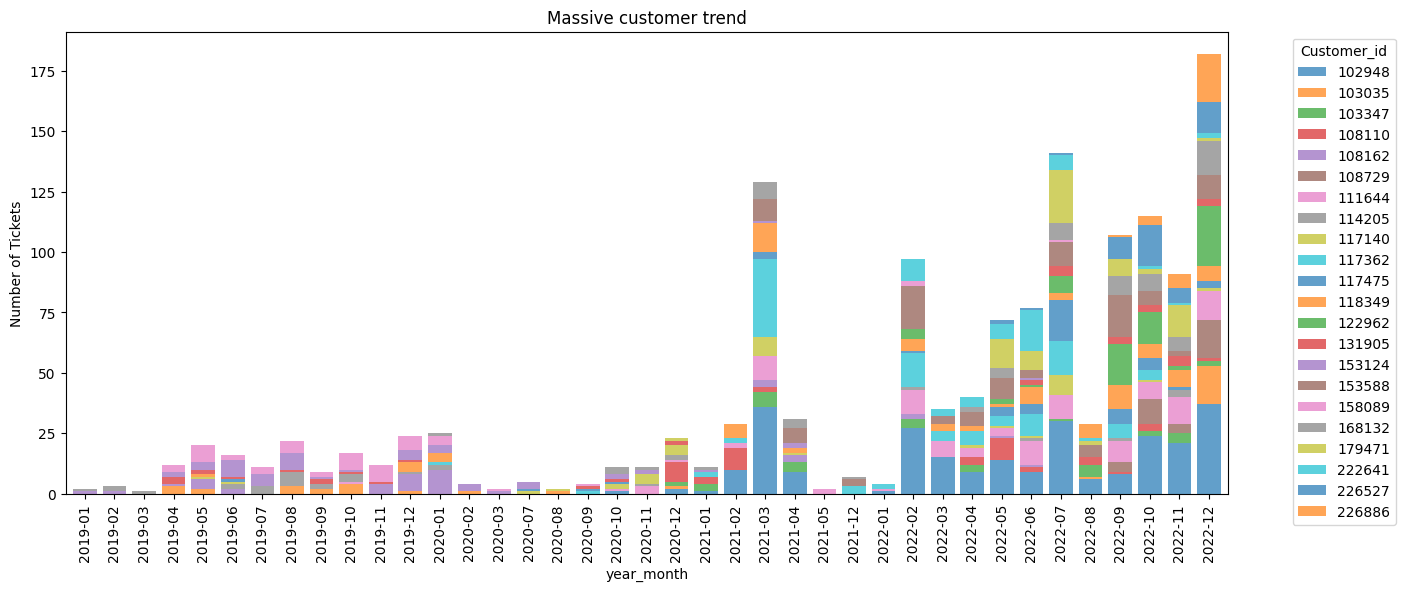

In [146]:
# Bieu do bar cot chong len nhau:
ax = df_customer_massive_pivot.plot(x = 'year_month', kind='bar', stacked=True, figsize=(15, 6), width=0.8, alpha = 0.7)

# Set the title and labels
ax.set_title('Massive customer trend')
# ax.set_xlabel('Month')
ax.set_ylabel('Number of Tickets')

# Add a legend
plt.legend(title='Customer_id', loc='upper right', bbox_to_anchor=(1.15, 1))

# Show the plot
plt.show()

> **Notes:**
>> - Nhóm KH mua vé > 30 lượt phân bố dàn trải --> không có hiện tượng spam vé, mua đi bán lại
>> - Chưa có gì bất thường

#### **Massive Promotion**

In [147]:
df_customer_value['n_promo_dis'] = df_customer_value['n_promotions'].apply(lambda x : 'more than 10' if x >= 10 else str(x))

In [148]:
df_promo_dis = df_customer_value.groupby('n_promo_dis').agg(total_customer = ('customer_id','count')).reset_index()

In [149]:
df_promo_dis

,n_promo_dis,total_customer
0,0.0,50498
1,1.0,61334
2,2.0,6264
3,3.0,1042
4,4.0,230
5,5.0,74
6,6.0,19
7,7.0,10
8,8.0,2
9,9.0,2


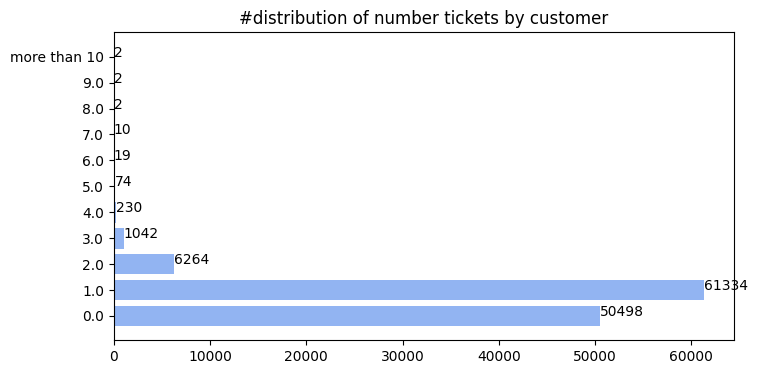

In [150]:
#  Bieu do cot ngang:
plt.figure(figsize=(8,4))

plt.barh(
    df_promo_dis['n_promo_dis'],
    df_promo_dis['total_customer'],
    color =  'cornflowerblue',
    alpha = 0.7
)

for index, value in enumerate(df_promo_dis['total_customer']):
    plt.text(value, index, str(value))

plt.title('#distribution of number tickets by customer')
plt.show()

>> - ~60% KH laf cos join các chương trình khuyến mãi
>> - Trong đó 90% là chỉ hưởng khuyến mãi 1 lần duy nhất
>>> - 1. Khách hàng đến 1 lần rồi thôi
>>> - 2. Các chương trình promotion chỉ cho 1 người dùng 1 lần (dành cho new customers) ??? --> verify với team Product hoặc MKT

In [151]:
### vậy loại KH mà KH đang dùng là gì ?

In [152]:
df_join_all.head(2)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,description,error_group,model,platform,age_days,age,month,name_day,hour,year_month,os_version,type
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,Order successful,unknown,"iPhone13,1",mobile,12972,35,7,Friday,17,2022-07,ios,promotion
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,Order successful,unknown,browser,website,12138,33,7,Friday,20,2022-07,browser,promotion


In [153]:
### đánh giá loại KM mà KH dùng
df_type_group = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['type'] == 'promotion')]
    .groupby('campaign_type')
    .agg(total_ticket = ('ticket_id','count'))
    .reset_index()
)

In [154]:
df_type_group

,campaign_type,total_ticket
0,direct discount,68449
1,reward point,3150
2,voucher,6924


In [155]:
## Tính tỷ lệ loại KM chi tiết cho từng nhóm KH (nhóm 1 KM, 2 KM, 3KM, ...)

In [156]:
df_n_success = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['type'] == 'promotion')]
    .groupby('customer_id')
    .agg(n_promotions = ('ticket_id','count'))
    .reset_index()
)

In [157]:
df_n_success.head(10)

,customer_id,n_promotions
0,100001,1
1,100003,1
2,100005,1
3,100007,1
4,100009,7
5,100010,1
6,100014,2
7,100015,2
8,100018,1
9,100020,1


In [158]:
df_n_pivot = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['type'] == 'promotion')]
    .pivot_table(
        index = 'customer_id',
        columns = 'campaign_type',
        values = 'ticket_id',
        aggfunc = 'count'
    )
    .reset_index()
)

In [159]:
df_n_pivot.head(10)

campaign_type,customer_id,direct discount,reward point,voucher
0,100001,NaN,NaN,1.0
1,100003,1.0,NaN,NaN
2,100005,NaN,NaN,1.0
3,100007,1.0,NaN,NaN
4,100009,7.0,NaN,NaN
5,100010,1.0,NaN,NaN
6,100014,2.0,NaN,NaN
7,100015,NaN,NaN,2.0
8,100018,1.0,NaN,NaN
9,100020,1.0,NaN,NaN


In [160]:
df_n_join = (
    pd.merge(df_n_success, df_n_pivot, how = 'inner', on = 'customer_id')
    .groupby('n_promotions')
    .agg(n_cuss = ('customer_id', 'count'),
         n_voucher = ('voucher', 'sum'),
         n_d_discount = ('direct discount', 'sum'),
         n_reward_point = ('reward point', 'sum'))
    .reset_index()
)

In [161]:
df_n_join

,n_promotions,n_cuss,n_voucher,n_d_discount,n_reward_point
0,1,61334,5358.0,53098.0,2878.0
1,2,6264,1091.0,11222.0,215.0
2,3,1042,293.0,2788.0,45.0
3,4,230,87.0,827.0,6.0
4,5,74,43.0,323.0,4.0
5,6,19,12.0,102.0,0.0
6,7,10,14.0,54.0,2.0
7,8,2,2.0,14.0,0.0
8,9,2,6.0,12.0,0.0
9,10,1,1.0,9.0,0.0


In [162]:
df_n_join['total'] = df_n_join.iloc[:, 2:].sum(axis=1)

In [163]:
for i in df_n_join.columns[2:5]:
  df_n_join[i+'_pct'] = df_n_join[i] / df_n_join['total']

In [164]:
df_n_join

,n_promotions,n_cuss,n_voucher,n_d_discount,n_reward_point,total,n_voucher_pct,n_d_discount_pct,n_reward_point_pct
0,1,61334,5358.0,53098.0,2878.0,61334.0,0.087358,0.865719,0.046923
1,2,6264,1091.0,11222.0,215.0,12528.0,0.087085,0.895754,0.017162
2,3,1042,293.0,2788.0,45.0,3126.0,0.093730,0.891875,0.014395
3,4,230,87.0,827.0,6.0,920.0,0.094565,0.898913,0.006522
4,5,74,43.0,323.0,4.0,370.0,0.116216,0.872973,0.010811
5,6,19,12.0,102.0,0.0,114.0,0.105263,0.894737,0.000000
6,7,10,14.0,54.0,2.0,70.0,0.200000,0.771429,0.028571
7,8,2,2.0,14.0,0.0,16.0,0.125000,0.875000,0.000000
8,9,2,6.0,12.0,0.0,18.0,0.333333,0.666667,0.000000
9,10,1,1.0,9.0,0.0,10.0,0.100000,0.900000,0.000000


In [165]:
format_dict = {
    'total' : '{:,.0f}',
    'n_voucher_pct' : '{:,.0%}',
    'n_d_discount_pct' : '{:,.0%}',
    'n_reward_point_pct' : '{:,.0%}'
}

In [166]:
# To mau heatmap cho table:
(
    df_n_join
    .drop(columns = ['n_voucher', 'n_d_discount', 'n_reward_point'])
    .style
    .format(format_dict)
    .background_gradient(subset = ['n_voucher_pct', 'n_d_discount_pct', 'n_reward_point_pct'],
                         cmap = 'PuBu')
    .background_gradient(subset = ['total'], cmap ='YlGn')
)


,n_promotions,n_cuss,total,n_voucher_pct,n_d_discount_pct,n_reward_point_pct
0,1,61334,"61,334",9%,87%,5%
1,2,6264,"12,528",9%,90%,2%
2,3,1042,"3,126",9%,89%,1%
3,4,230,920,9%,90%,1%
4,5,74,370,12%,87%,1%
5,6,19,114,11%,89%,0%
6,7,10,70,20%,77%,3%
7,8,2,16,12%,88%,0%
8,9,2,18,33%,67%,0%
9,10,1,10,10%,90%,0%


> **Notes:**
>> - ~90% KH chọn tham gia các campaign Direct discount
>> - Đánh giá thêm về Reetention của KH --> Quay trở lại ? --> Hiệu quả của MKT?

### **3.5 Customer retention - Cohort Analysis**

In [167]:
# 1. Dựa vào thời điểm chuyển đổi khách hàng; lần đầu thanh toán, mua hàng, cài app

In [168]:
from operator import attrgetter
import matplotlib.colors as mcolors
import seaborn as sns

In [169]:
# Bước 1: Tính các thông tin: cohort (first month), curent_month, subsequent_month
df_selected_time = df_join_all[(df_join_all['time'] < '2020-01-01') & (df_join_all['status_id']==1)]
df_selected_time['first_month'] = df_selected_time.groupby('customer_id')['time'].transform('min').dt.to_period('M')
df_selected_time['current_month'] = df_selected_time['time'].dt.to_period('M')
df_selected_time['subsequent_month'] = (df_selected_time['current_month'] - df_selected_time['first_month']).apply(attrgetter('n'))

<ipython-input-169-0aba850fb27f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_time['first_month'] = df_selected_time.groupby('customer_id')['time'].transform('min').dt.to_period('M')
<ipython-input-169-0aba850fb27f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_time['current_month'] = df_selected_time['time'].dt.to_period('M')
<ipython-input-169-0aba850fb27f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [170]:
df_selected_time.head(5)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,description,error_group,model,platform,age_days,age,month,name_day,hour,year_month,os_version,type,first_month,current_month,subsequent_month
11327,9e3e753f70aede1c6dcc577ce563eef1,100009,credit card,74.0,3cac5d2e2eb76525aecea5c2ab46b3d9,9.07,2.56,6.51,2019-11-09 16:19:41.008,1,25680,Doctor Sleep,Male,1989-02-25,direct discount,Order successful,unknown,"iPhone10,2",mobile,12972,35,11,Saturday,16,2019-11,ios,promotion,2019-04,2019-11,7
11328,74a0ac9b7c60d2e7d3664686c3342c00,101892,money in app,79.0,fe9a5c91e224f005a8be1c62923548d8,9.07,2.56,6.51,2019-11-16 16:35:02.953,1,25690,Doctor Sleep,Female,1986-10-19,direct discount,Order successful,unknown,Samsung SM-N935F,mobile,13832,37,11,Saturday,16,2019-11,android & other,promotion,2019-08,2019-11,3
11329,4a653fb01188cfaefe7e3731de2648de,105574,credit card,43.0,99b47df3cdeecb3dec4da6c18b916dd0,9.07,2.56,6.51,2019-11-09 18:10:13.461,1,25680,Doctor Sleep,Male,1935-01-01,direct discount,Order successful,unknown,"iPhone9,2",mobile,32751,89,11,Saturday,18,2019-11,ios,promotion,2019-11,2019-11,0
11332,f075d68aa14bc424e3d9ca7904f900a5,111681,credit card,123.0,a43fb711603d5f2be7001397d280e413,8.66,2.10,6.56,2019-11-16 22:02:42.851,1,25690,Doctor Sleep,Not verify,1970-01-01,direct discount,Order successful,unknown,HTC HTC_U-3u,mobile,19967,54,11,Saturday,22,2019-11,android & other,promotion,2019-11,2019-11,0
11333,747efd023e43617ca96e127c8af625b8,116896,money in app,72.0,ac219f148fe5a9653b48ce64b41625b7,6.19,0.00,6.19,2019-11-13 17:32:32.892,1,0,Doctor Sleep,Male,1990-08-30,unknown,Order successful,unknown,OnePlus HD1900,mobile,12421,34,11,Wednesday,17,2019-11,android & other,non-promotion,2019-11,2019-11,0


In [171]:
# Buoc 2: Group by Cohort

df_cohort = (
    df_selected_time
    .groupby(['first_month', 'current_month', 'subsequent_month'])
    .agg(total_customer = ('customer_id', 'nunique'))
    .reset_index(drop=False)
)

In [172]:
df_cohort.head(10) # pivot ket qua nay

,first_month,current_month,subsequent_month,total_customer
0,2019-01,2019-01,0,1348
1,2019-01,2019-02,1,50
2,2019-01,2019-03,2,35
3,2019-01,2019-04,3,26
4,2019-01,2019-05,4,25
5,2019-01,2019-06,5,33
6,2019-01,2019-07,6,36
7,2019-01,2019-08,7,29
8,2019-01,2019-09,8,18
9,2019-01,2019-10,9,35


In [173]:
# Pivot table
df_cohort_pivot = (
    df_cohort
    .pivot_table(
        index = 'first_month',
        columns = 'subsequent_month',
        values = 'total_customer',
    )
)

In [174]:
df_cohort_pivot.head(10)

subsequent_month,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2019-01,1348.0,50.0,35.0,26.0,25.0,33.0,36.0,29.0,18.0,35.0,21.0,20.0
2019-02,1293.0,58.0,88.0,64.0,78.0,50.0,58.0,30.0,46.0,29.0,35.0,NaN
2019-03,745.0,51.0,48.0,49.0,33.0,33.0,30.0,34.0,23.0,14.0,NaN,NaN
2019-04,2922.0,101.0,103.0,87.0,92.0,66.0,96.0,63.0,42.0,NaN,NaN,NaN
2019-05,3226.0,145.0,118.0,129.0,90.0,93.0,90.0,62.0,NaN,NaN,NaN,NaN
2019-06,3062.0,131.0,151.0,98.0,133.0,114.0,63.0,NaN,NaN,NaN,NaN,NaN
2019-07,2611.0,121.0,79.0,99.0,78.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,3735.0,112.0,155.0,106.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,2169.0,117.0,67.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
# Chuyen sang %
cohort_size = df_cohort_pivot.iloc[:,0]
retention_matrix = df_cohort_pivot.divide(cohort_size, axis=0)

In [176]:
cohort_size

,0
first_month,
2019-01,1348.0
2019-02,1293.0
2019-03,745.0
2019-04,2922.0
2019-05,3226.0
2019-06,3062.0
2019-07,2611.0
2019-08,3735.0
2019-09,2169.0


In [177]:
retention_matrix

subsequent_month,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2019-01,1.0,0.037092,0.025964,0.019288,0.018546,0.024481,0.026706,0.021513,0.013353,0.025964,0.015579,0.014837
2019-02,1.0,0.044857,0.068059,0.049497,0.060325,0.038670,0.044857,0.023202,0.035576,0.022428,0.027069,NaN
2019-03,1.0,0.068456,0.064430,0.065772,0.044295,0.044295,0.040268,0.045638,0.030872,0.018792,NaN,NaN
2019-04,1.0,0.034565,0.035250,0.029774,0.031485,0.022587,0.032854,0.021561,0.014374,NaN,NaN,NaN
2019-05,1.0,0.044947,0.036578,0.039988,0.027898,0.028828,0.027898,0.019219,NaN,NaN,NaN,NaN
2019-06,1.0,0.042782,0.049314,0.032005,0.043436,0.037231,0.020575,NaN,NaN,NaN,NaN,NaN
2019-07,1.0,0.046342,0.030257,0.037917,0.029874,0.015320,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,1.0,0.029987,0.041499,0.028380,0.017135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,1.0,0.053942,0.030890,0.017981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


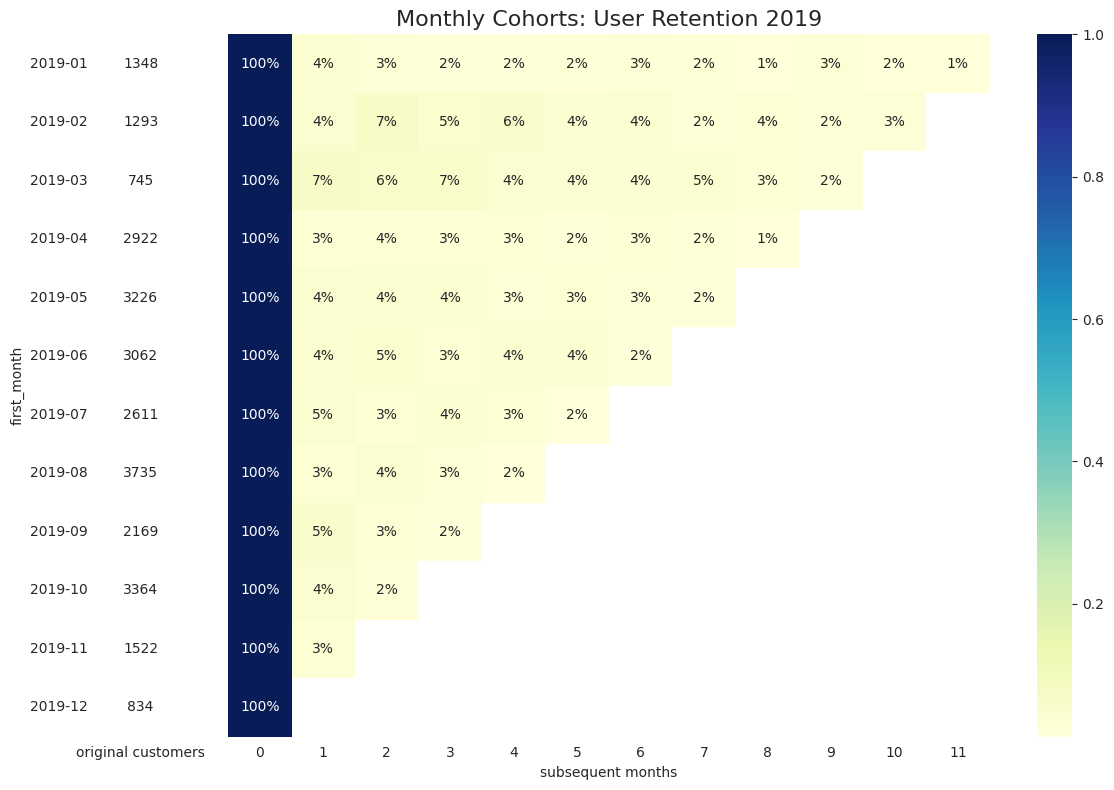

In [178]:
# Vẽ biểu đồ cohort
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='YlGnBu',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention 2019', fontsize=16)
    ax[1].set(xlabel='subsequent months',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'original customers'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                alpha=0.5,
                ax=ax[0])

    fig.tight_layout()

In [179]:
# Bước 1: Tính các thông tin: cohort (first month), curent_month, subsequent_month
df_selected_time = df_join_all[(df_join_all['time'] >= '2022-01-01') & (df_join_all['status_id']==1)]
df_selected_time['first_month'] = df_selected_time.groupby('customer_id')['time'].transform('min').dt.to_period('M')
df_selected_time['current_month'] = df_selected_time['time'].dt.to_period('M')
df_selected_time['subsequent_month'] = (df_selected_time['current_month'] - df_selected_time['first_month']).apply(attrgetter('n'))

<ipython-input-179-a5cff6af428a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_time['first_month'] = df_selected_time.groupby('customer_id')['time'].transform('min').dt.to_period('M')
<ipython-input-179-a5cff6af428a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_time['current_month'] = df_selected_time['time'].dt.to_period('M')
<ipython-input-179-a5cff6af428a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [180]:
# Buoc 2: Group by Cohort

df_cohort = (
    df_selected_time
    .groupby(['first_month', 'current_month', 'subsequent_month'])
    .agg(total_customer = ('customer_id', 'nunique'))
    .reset_index(drop=False)
)

In [181]:
# Pivot table
df_cohort_pivot = (
    df_cohort
    .pivot_table(
        index = 'first_month',
        columns = 'subsequent_month',
        values = 'total_customer',
    )
)

In [182]:
# Chuyen sang %
cohort_size = df_cohort_pivot.iloc[:,0]
retention_matrix = df_cohort_pivot.divide(cohort_size, axis=0)

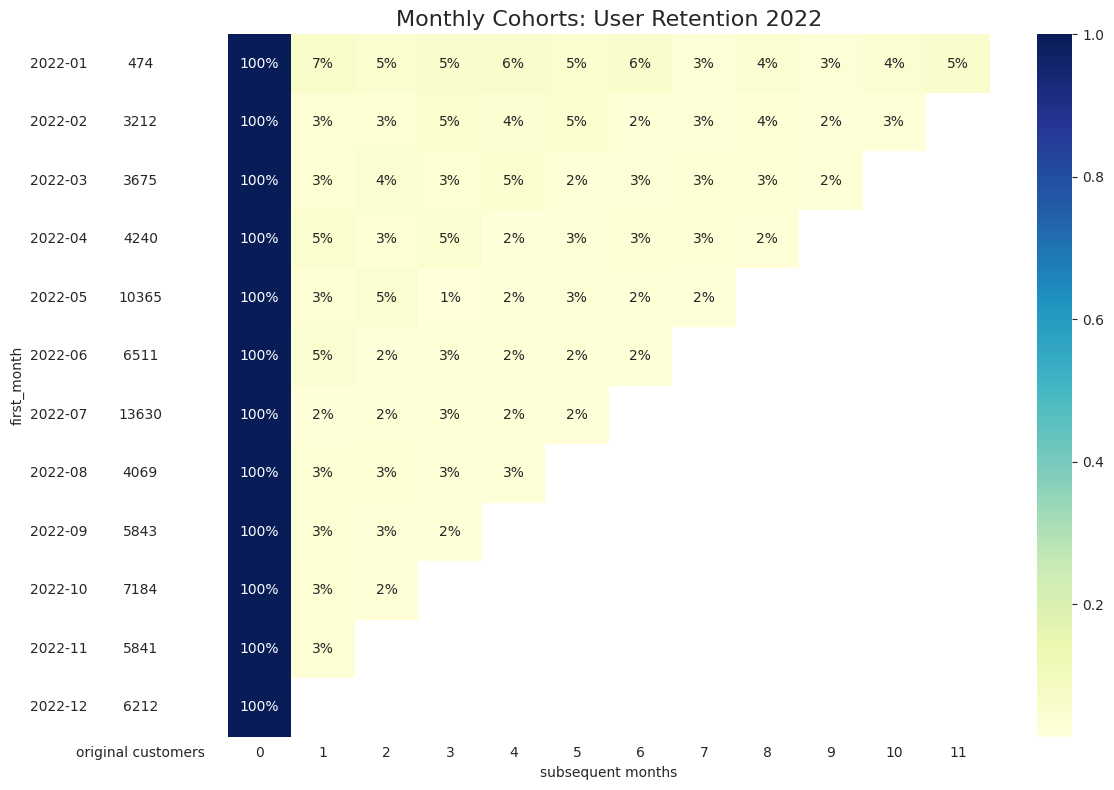

In [183]:
# Vẽ biểu đồ cohort
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='YlGnBu',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention 2022', fontsize=16)
    ax[1].set(xlabel='subsequent months',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'original customers'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                alpha=0.5,
                ax=ax[0])

    fig.tight_layout()

> **Notes**:
> - Retention 20219 và 2022 không có nhiều sự thay đổi, do thị trường phim mới hồi phục nên chưa có nhiều thời gian để cty cải thiện
> - Lý do retention thấp mặc dù rõ ràng 60-65% traffic có chạy promotion trong năm 2022?

#### **Compare: Retention of promotion customers & organic customers**

In [184]:
# By payment method
df_pie_promo = (
    df_join_all[(df_join_all['status_id']==1) & (df_join_all['time'] >= '2022-01-01')]
    .groupby('type')
    .agg(total_ticket = ('customer_id','nunique'))
    .sort_values(by='total_ticket', ascending=True)
    .reset_index()
)

In [185]:
df_pie_promo

,type,total_ticket
0,non-promotion,27672
1,promotion,47507


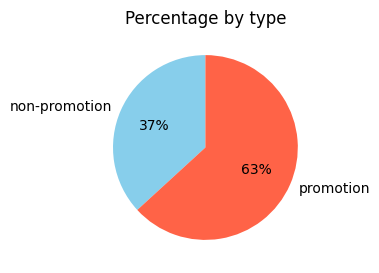

In [186]:
# pie
plt.figure(figsize=(6,3))
plt.pie(
    df_pie_promo['total_ticket'],
    labels = df_pie_promo['type'],
    autopct = '%1.0f%%',
    colors = df_pie_promo['type'].replace({'promotion':'tomato', 'non-promotion':'skyblue'}),
    startangle = 90
)
plt.title('Percentage by type')
plt.show()

In [187]:
# Phan biet nhom den tu promotion va nhom organic: dua vao ve dau tien (first order)

In [188]:
df_data_check = (
    df_join_all[(df_join_all['status_id']==1) & (df_join_all['time'] >= '2022-01-01')][['customer_id','ticket_id','time','type']]
    .sort_values(by=['customer_id','time'])
)

In [189]:
df_data_check.head(10)

,customer_id,ticket_id,time,type
66484,100003,34c4764b4afa000af4c33a525f20eace,2022-05-22 12:52:12.105,non-promotion
10001,100004,1c4aa39842bfc83dbb5856c25a33d9cb,2022-12-20 06:26:21.373,non-promotion
108794,100007,5565ba5e22475c7cce298a2bea470428,2022-03-21 17:57:18.460,promotion
0,100009,4f5200dcdcf2396b8d50ff84bf423f32,2022-07-08 17:46:36.145,promotion
5585,100009,0724203b5146b0ebae6e3678ed7eccde,2022-12-24 09:32:45.477,promotion
69405,100013,f95441286dcfa045f61a5760662616e1,2022-05-05 12:22:44.587,non-promotion
140483,100018,1e40fb2d0f6264ed3127f79b1a12c9c9,2022-09-07 21:13:17.896,non-promotion
90595,100018,9a959ff1649950949ff2c0aff4b62205,2022-11-19 16:25:43.981,promotion
35270,100020,af02fc96a6703af7d93162d9f8c61dba,2022-05-28 19:09:37.936,promotion
16649,100023,5ed44ff62214268ffcb14d4ea78b04d8,2022-05-16 08:45:42.397,promotion


In [190]:
# Danh so thu tu cac ticket cua khach hang:
df_data_check['row_number'] = df_data_check.groupby('customer_id').cumcount() + 1

In [191]:
# So KH co first payment la promotion:
df_data_check[(df_data_check['type']=='promotion') & (df_data_check['row_number']==1)]['customer_id'].nunique()

46189

In [192]:
46189/47507

0.9722567200623066

In [193]:
# Co 97% KH den tu promotion trong nhom KH co tham gia promotion  --> Retention la bao nhieu ?

In [194]:
df_first_promo_list = df_data_check[(df_data_check['type']=='promotion') & (df_data_check['row_number']==1)]['customer_id']
df_first_promo_list.drop_duplicates(inplace=True)

df_first_promo_check = pd.merge(df_data_check, df_first_promo_list, how='inner', on='customer_id')

<ipython-input-194-f4a522d3efc3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_promo_list.drop_duplicates(inplace=True)


In [195]:
(
    df_first_promo_check[df_first_promo_check['row_number']==2]['customer_id'].nunique()
    /
    df_first_promo_check['customer_id'].nunique()
)

0.1308969668102795

In [196]:
# 13% KH quay lai ke tu lan dau tham gia promotion (ty le chuyen doi, giu chan = 13%)

# --> Nhom organic co khac biet khong ?

In [197]:
df_first_non_promo = df_data_check[(df_data_check['type']=='non-promotion') & (df_data_check['row_number']==1)]['customer_id']
df_first_non_promo.drop_duplicates(inplace=True)

df_first_non_promo_check = pd.merge(df_data_check, df_first_non_promo, how='inner', on='customer_id')

(
    df_first_non_promo_check[df_first_non_promo_check['row_number']==2]['customer_id'].nunique()
    /
    df_first_non_promo_check['customer_id'].nunique()
)

<ipython-input-197-ab30f2f1bdbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_non_promo.drop_duplicates(inplace=True)


0.12195316551641601

In [198]:
# Nhom KH first_time la organic --> ty le quay lai = 12%

>**Notes:**
>- **97%** promotion 2022 là dành cho NEW CUSTOMERS, tuy nhiên
>- Chỉ có **13%** quay trở lại lần sau, trong khi tỷ lệ này của nhóm organic là **12%**

> --> Công ty đang chú trọng acquire new customers nhưng chưa đẩy mạnh việc giữ chân và duy trì lượng KH cũ

### **3.6 Payment success rate**

#### **Overview**

In [199]:
def calculate_n_success(x):
    return (x == 1).sum()

df_sr = (
    df_join_all
    .groupby('year_month')
    .agg(n_ords = ('ticket_id', 'count'), # total ticket
         n_success = ('status_id', calculate_n_success)) # success ticket
    .assign(success_rate=lambda x: (x['n_success'] / x['n_ords']) * 100) # tạo thêm 1 column tính SR
    .reset_index()
)

In [200]:
df_sr.head(10)

,year_month,n_ords,n_success,success_rate
0,2019-01,2019,1359,67.310550
1,2019-02,1626,1427,87.761378
2,2019-03,1004,866,86.254980
3,2019-04,4069,3190,78.397641
4,2019-05,4430,3617,81.647856
5,2019-06,4387,3604,82.151812
6,2019-07,3872,3165,81.740702
7,2019-08,5444,4514,82.916973
8,2019-09,3278,2772,84.563758
9,2019-10,5284,4336,82.059046


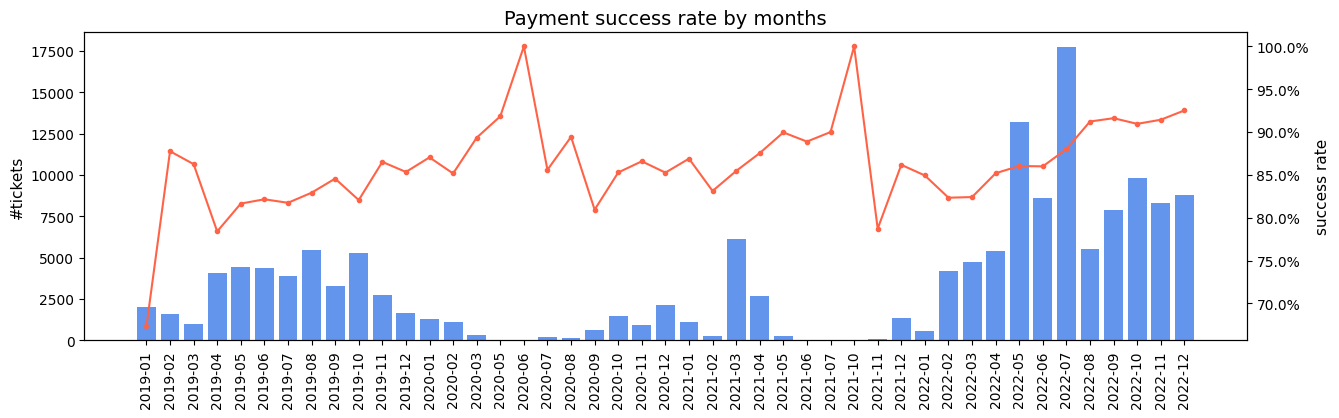

In [201]:
# Vẽ biểu đồ cột và đường

from matplotlib.ticker import PercentFormatter

fig, ax1 = plt.subplots(figsize=(15,4))

ax1.bar(df_sr['year_month'], df_sr['n_ords'], color="cornflowerblue")
plt.ylabel('#tickets', fontsize=11)
plt.xticks(rotation='vertical')

ax2 = ax1.twinx()
ax2.plot(df_sr['year_month'], df_sr['success_rate'], color="tomato", marker="o", ms=3)
ax2.yaxis.set_major_formatter(PercentFormatter())

plt.ylabel('success rate', fontsize=11)
plt.title('Payment success rate by months', fontsize=14)

plt.show()

#### **Error trends**

In [202]:
df_join_all.head(5)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,description,error_group,model,platform,age_days,age,month,name_day,hour,year_month,os_version,type
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,Order successful,unknown,"iPhone13,1",mobile,12972,35,7,Friday,17,2022-07,ios,promotion
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,Order successful,unknown,browser,website,12138,33,7,Friday,20,2022-07,browser,promotion
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Male,1989-05-18,unknown,Order successful,unknown,unknown,mobile,12890,35,7,Saturday,11,2022-07,unknown,non-promotion
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Male,1997-08-31,direct discount,Order successful,unknown,devicemodel,mobile,9863,27,7,Monday,22,2022-07,unknown,promotion
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Male,1988-09-20,direct discount,Order successful,unknown,devicemodel,mobile,13130,35,7,Sunday,18,2022-07,unknown,promotion


In [203]:
# Phan bo nhom loi:
df_error_group = (
    df_join_all[df_join_all['status_id'] != 1]
    .groupby(['year_month','error_group'])
    .agg(n_ords = ('ticket_id','count'))
    .sort_values(by='year_month')
    .reset_index()
)

In [204]:
df_error_group.head(5)

,year_month,error_group,n_ords
0,2019-01,customer,291
1,2019-01,external,369
2,2019-02,customer,66
3,2019-02,external,133
4,2019-03,customer,44


In [205]:
df_error_group['error_group'].unique()

array(['customer', 'external', 'internal'], dtype=object)

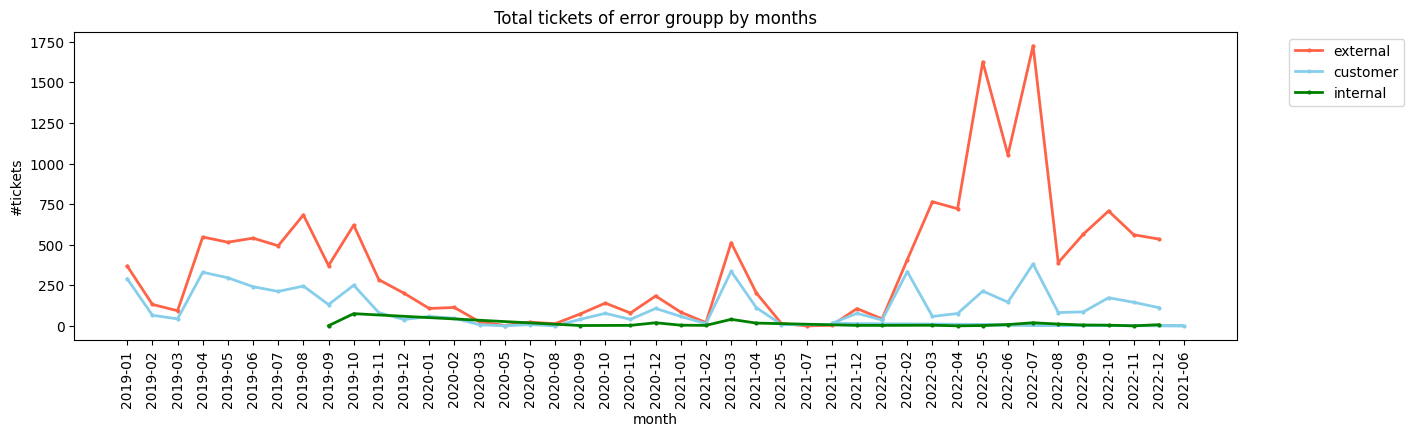

In [206]:
# Phan bo nhom loi:
error_color_pairs = [('external','tomato'), ('customer','skyblue'), ('internal','green')]

plt.figure(figsize=(15,4))
for error, color in error_color_pairs:
    df_err_line = df_error_group[df_error_group['error_group'] == error]
    plt.plot(df_err_line['year_month'], df_err_line['n_ords'], label = error, marker='o',color=color, lw=2, markersize=2)

plt.title('Total tickets of error groupp by months')
plt.xlabel('month')
plt.ylabel('#tickets')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=90)
plt.show()

In [207]:
# Nhom loi external tang dot bien trong 2022?

In [208]:
# Phan bo ma loi:
df_error = (
    df_join_all[df_join_all['status_id'] != 1]
    .groupby(['year_month','description'])
    .agg(n_ords = ('ticket_id','count'))
    .sort_values(by='year_month',ascending=True)
    .reset_index()
)

In [209]:
df_error.head(10)

,year_month,description,n_ords
0,2019-01,Insufficient funds in customer account. Please add more funds and try the transaction again.,217
1,2019-01,No response from your bank,228
2,2019-01,Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.,56
3,2019-01,Payment failed from bank,141
4,2019-01,Payment overdue,18
5,2019-02,Insufficient funds in customer account. Please add more funds and try the transaction again.,42
6,2019-02,No response from your bank,67
7,2019-02,Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.,11
8,2019-02,Payment failed from bank,66
9,2019-02,Payment overdue,13


In [210]:
df_error.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year_month   226 non-null    object
 1   description  226 non-null    object
 2   n_ords       226 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 5.4+ KB


In [211]:
df_error['description'].unique()

array(['Insufficient funds in customer account. Please add more funds and try the transaction again.',
       'No response from your bank',
       'Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.',
       'Payment failed from bank', 'Payment overdue',
       'Transaction temporarily limited',
       'Need verify your account to continue'], dtype=object)

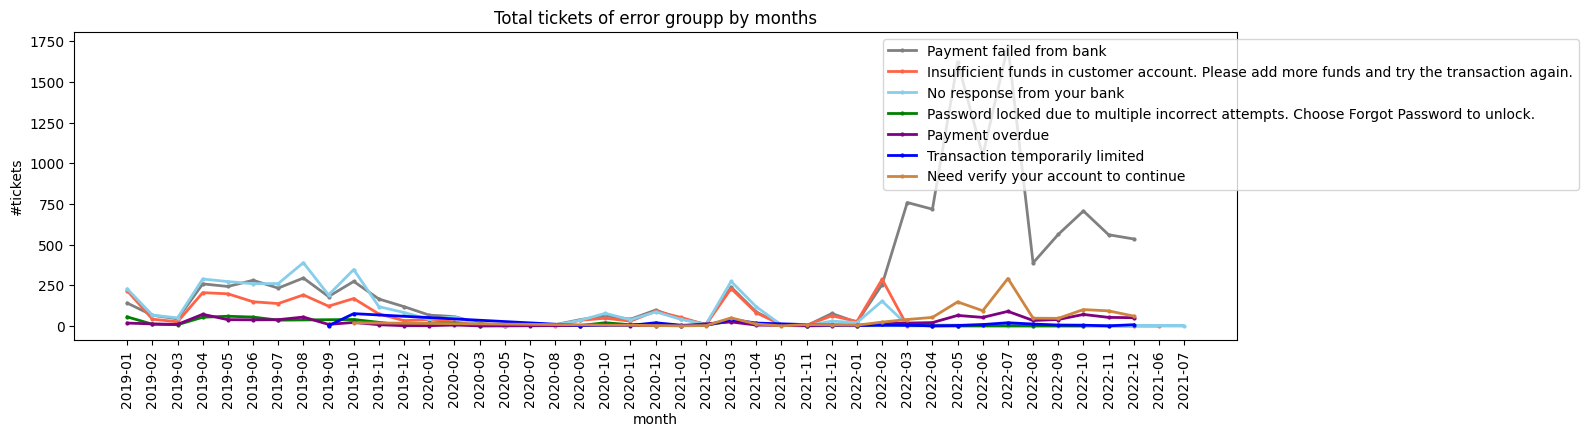

In [212]:
# Phan bo ma loi:
error_color_pairs = [('Payment failed from bank','gray'),
 ('Insufficient funds in customer account. Please add more funds and try the transaction again.','tomato'),
  ('No response from your bank','skyblue'), ('Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.','green'),
                     ('Payment overdue','purple'), ('Transaction temporarily limited','blue'),
                      ('Need verify your account to continue','peru')]

plt.figure(figsize=(15,4))
for error, color in error_color_pairs:
    df_err_line = df_error[df_error['description'] == error]
    plt.plot(df_err_line['year_month'], df_err_line['n_ords'], label = error, marker='o',color=color, lw=2, markersize=2)

plt.title('Total tickets of error groupp by months')
plt.xlabel('month')
plt.ylabel('#tickets')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation=90)
plt.show()

In [213]:
# Loi den tu bank dot bien ???

#### **SR = 0%, why and how?**

In [214]:
list_sr_0 = list(df_customer_value[df_customer_value['success_rate'] < 0.1]['customer_id'].unique())

In [215]:
df_customer_value[df_customer_value['success_rate'] < 0.1]['customer_id'].nunique()

13701

In [216]:
df_customer_value.head(5)

,customer_id,n_total,n_failed,n_success,s_money,s_discount,n_days,n_months,n_promotions,success_rate,promotion_rate,discount_rate,n_order_dis,n_promo_dis
0,100001,1,0,1.0,7.42,2.06,1.0,1.0,1.0,1.0,1.000000,0.277628,1.0,1.0
1,100003,6,0,6.0,60.95,2.56,6.0,6.0,1.0,1.0,0.166667,0.042002,6.0,1.0
2,100004,1,0,1.0,32.25,0.00,1.0,1.0,0.0,1.0,0.000000,0.000000,1.0,0.0
3,100005,1,0,1.0,9.49,2.06,1.0,1.0,1.0,1.0,1.000000,0.217071,1.0,1.0
4,100006,1,0,1.0,12.37,0.00,1.0,1.0,0.0,1.0,0.000000,0.000000,1.0,0.0


In [217]:
def calculate_n_promotion(x):
    return (x == 'promotion').sum()

df_sr_0_metric = (
    df_join_all[df_join_all['customer_id'].isin(list_sr_0)]
    .groupby('customer_id')
    .agg(n_orders = ('ticket_id', 'count'), # total ticket
         s_money = ('original_price','sum'),
         s_discount = ('discount_value','sum'),
         n_promotions = ('type',calculate_n_promotion)
    )
    .reset_index()
)

In [218]:
df_sr_0_metric['promotion_rate'] = df_sr_0_metric['n_promotions'] / df_sr_0_metric['n_orders']
df_sr_0_metric['discount_rate'] = df_sr_0_metric['s_discount'] / df_sr_0_metric['s_money']

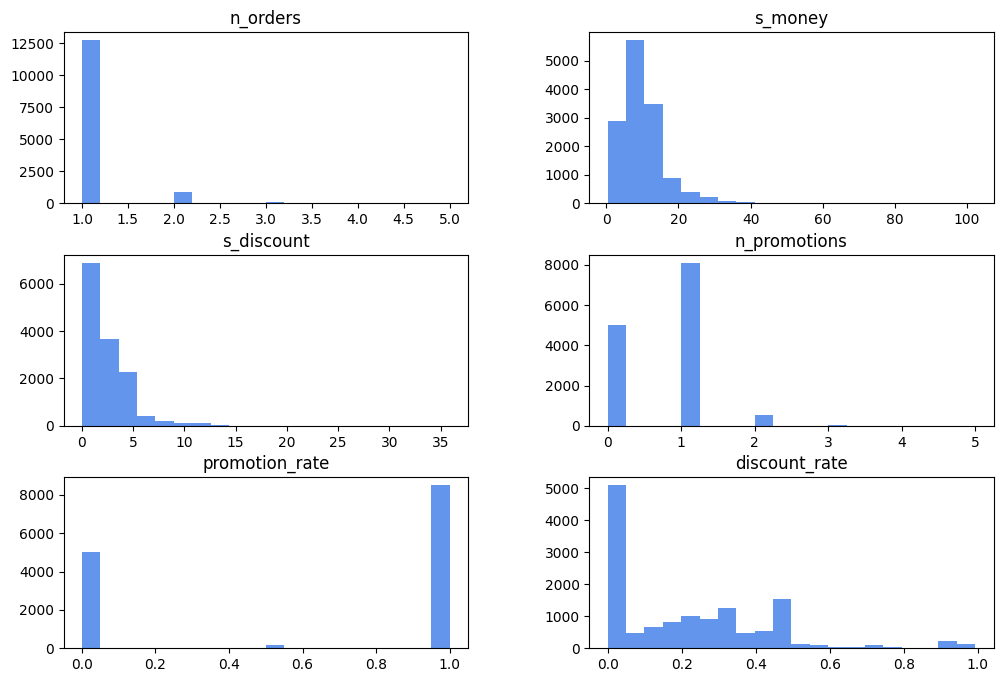

In [219]:
df_sr_0_metric.iloc[:,1:].hist(figsize=(12,8), grid=False, color='cornflowerblue',bins=20)
plt.show()

In [220]:
# Ho bi loi gi ma tai sao faild 1 lan va stop luon? Ho khong retry?

In [221]:
# Detail erorr
# Phan bo nhom loi:
df_error_0 = (
    df_join_all[(df_join_all['status_id'] != 1) & (df_join_all['customer_id'].isin(list_sr_0))]
    .groupby(['year_month','description'])
    .agg(n_ords = ('ticket_id','count'))
    .sort_values(by='year_month')
    .reset_index()
)

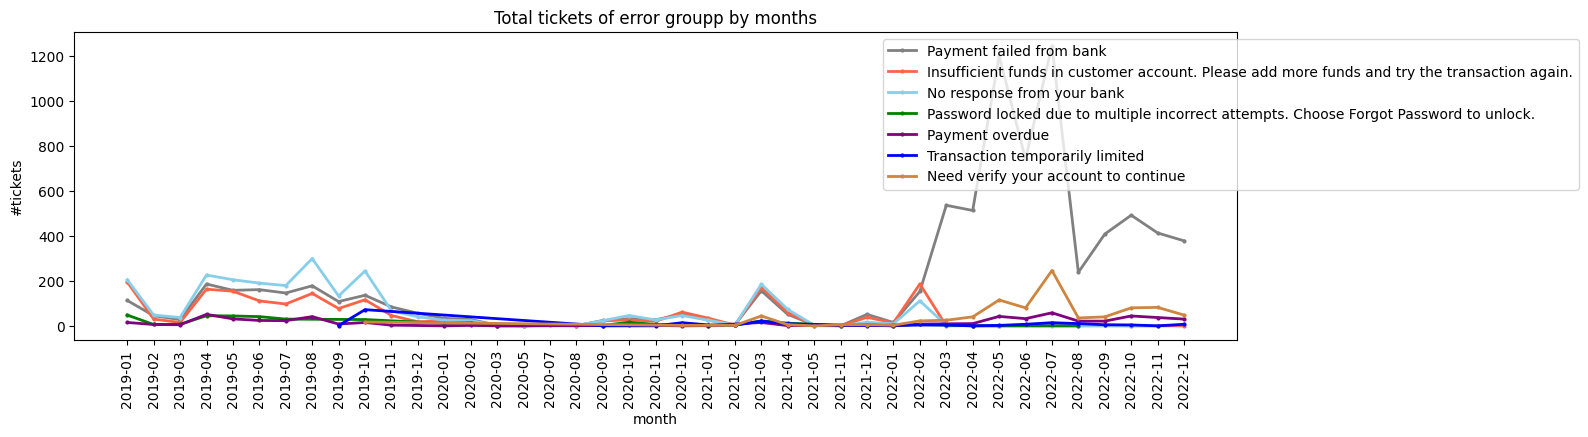

In [222]:
# Phan bo ma loi:
error_color_pairs = [('Payment failed from bank','gray'),
 ('Insufficient funds in customer account. Please add more funds and try the transaction again.','tomato'),
  ('No response from your bank','skyblue'), ('Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.','green'),
                     ('Payment overdue','purple'), ('Transaction temporarily limited','blue'),
                      ('Need verify your account to continue','peru')]

plt.figure(figsize=(15,4))
for error, color in error_color_pairs:
    df_err_line = df_error_0[df_error_0['description'] == error]
    plt.plot(df_err_line['year_month'], df_err_line['n_ords'], label = error, marker='o',color=color, lw=2, markersize=2)

plt.title('Total tickets of error groupp by months')
plt.xlabel('month')
plt.ylabel('#tickets')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation=90)
plt.show()

> **Notes:**
>> - Nhóm bị lỗi này cũng gần như là nhóm bị lỗi của toàn bộ KH (nhìn lại chart phía trên)
>> - Lý do họ lỗi và stop là do:
>>> - 1. Lỗi bên bank và họ không chủ động được nữa
>>> - 2. Lỗi định danh tài khoản --> Nghi ngờ gian lận hoặc không đủ điều kiện để upgrade level tài khoản